In [330]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns

import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

In [331]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX'

### HARDCODING THE IMPORT HEKA PATH

In [332]:
# Add heka_reader to PYTHONPATH
import sys
#fpath = '/Users/Fechner/PythonStuff/heka_reader' #initial version delete
fpath = '/Users/Fechner/Dropbox/PythonImport/heka_reader' #MAC
sys.path.append(fpath)
import heka_reader

### got the heka reader from here
https://github.com/campagnola/heka_reader

- clone the repository to your computer (move to directory with terminal commands. Mine here is called PythonStuff at the moment: change name)
    - git clone https://github.com/campagnola/heka_reader.git
- the heka reader enables to read and access the .dat files (to work in jupyter notebook, you habe to append the heka_reader to the path where the heka reader is stored)
- browser.py enables to easily browse for recordings within a .dat comparable to Igor or other similar programs
- I changed the following in my local browser.py version, because the functions output was a tuple:
    - def load_clicked():
    - Display a file dialog to select a .dat file
    - file_name = pg.QtGui.QFileDialog.getOpenFileName()
    - if isinstance(file_name, tuple):   (ADDED THIS LINE)
        -    file_name = file_name[0]    (ADDED THIS LINE)
    - if file_name == '':
        -    return
    - load(file_name)

## examples of how to access data structure

    # Select a trace
    trace = bundle.pul[group_ind][series_ind][sweep_ind][trace_ind]
    
    # Print meta-data for this trace
    print(trace)
    
    # Load data for this trace
    data = bundle.data[group_id, series_id, sweep_ind, trace_ind]
    

# change file directory

In [333]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX


In [334]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'
filedirSelNterm = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/SelectivityNterm/'


filenameMeta = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'

# ENTER HARDCODED HERE: FROGS (FILES) TO USE

In [335]:
listofFiles = ['063','064','065','068','069',
    '100','101','102','103','104','105','106','107','108','109','110','111']#'100','101','102','103','104','105',

In [336]:
AllMetaData = pd.DataFrame()

for i in range(len(listofFiles)):
    df_temp = pd.read_excel(filenameMeta+'TEVCMetaSTFX'+listofFiles[i]+'-Selectivity.xlsx', sep="," )
    AllMetaData = AllMetaData.append(df_temp,ignore_index=True)
    #print(df_temp)
    
AllMetaData.to_csv(filedirSelNterm+'MetaSelectivityNterm-.csv', header=True, index=None, sep=',', mode='w') 

In [337]:
filenameRatio = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/'

In [338]:
TESTDIC = {"Injection":[],"CellID":[],"StartSol":[],"VrStart":[],'Iminus85Start':[],"TestSol":[],"VrTest":[],'Iminus85Test':[]}

for i in range(len(AllMetaData['CellID'])): #range(28,29
    try:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
    except FileNotFoundError:
        continue
    else:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
        #print(df_temp.head())
        if len(df_temp) % 2 == 0:
            NewLoc = 0
            #print("{0} is Even".format(len(df_temp)))
            for m in range(int(len(df_temp)/2)):

                TESTDIC["Injection"].append(df_temp.loc[m,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #print(NewLoc)
                NewLoc = NewLoc +2
                #print(NewLoc)
                #NewLoc = NewLoc + 10
                #print(NewLoc)

        else:
           # print("{0} is Odd".format(len(df_temp)))
            NewLoc = 0
            for m in range(int((len(df_temp)-1)/2)): #check if -1 works for more than 3 rows, for 5???
                TESTDIC["Injection"].append(df_temp.loc[NewLoc,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #TESTDIC["Iminus85Test"].dropna(how = 'any')
                
                #print(NewLoc)
                NewLoc = NewLoc +2

                
df = pd.DataFrame.from_dict(TESTDIC)

df = df.dropna(how='any')

df['Vd'] = df["VrTest"]-df["VrStart"]
df['Permeability'] = 1/(np.exp(df['Vd'].values*1000/25.6*-1))
df['Ratio'] = df["Iminus85Test"]/df["Iminus85Start"]


df.to_csv(filedirSelNterm+'RatioVrevSelectivityNterm-.csv', header=True, index=None, sep=',', mode='w') 

#print(df['Permeability'])


In [339]:
filedirSelNterm

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/SelectivityNterm/'

## common axis parameters

In [340]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

SizeOfMarker = 2
SizeofLine = 0.5

# ENTER HERE HARDCODED THE DICTIONARY OF MUTANTS

In [341]:
ReNameAlanin ={'F84A':'mg738mg012',# 
         'K85A':'mg739mg012',
         'E86A':'mg740mg012',
         #'F87A':'mg741mg012',
         'C88A':'mg748mg012',
         'Y89A':'mg759mg012',
         #'K90A':'mg745mg012',
         #'T91A':'mg752mg012',
         #'S92A':'mg749mg012',
         'ctr A93':'mg419mg012',
         'H94A':'mg750mg012',
         #'G95A':'mg746mg012',
         #'I96A':'mg747mg012',
         'P97A':'mg760mg012',
         'M98A':'mg753mg012',
         #'I99A':'mg761mg012',
         'G100A':'mg751mg012'      
        }

ReNameChimera={ 'ctr A93':'mg419mg012',
#               'M4-DT1ABC':'mg733mg012',
#       'M4-DT1A':'mg734mg012',
#                'M4-DT1A':'mg734mg012',
#                'M4-DT1B':'mg735mg012',
               'M4-DT1C':'mg742mg012',
#                 'M4+M4-DT1A':'mg419mg734mg012',
#                'M4+M4-DT1B':'mg419mg735mg012',
#                'M4+M4-DT1C':'mg419mg742mg012',
               #'DT1-NtermM4':'mg756mg012',
               #'DT1-M4ABC':'mg736mg012',
#                'DT1-M4A':'mg737mg012',
#                'DT1-M4B':'mg757mg012',
#                'DT1-M4C':'mg758mg012',
              }

#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

In [342]:
df.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg419mg012,STFX063014,NaGluSel1,0.005257,1.082743e-05,KGluSel,-0.039298,1.808445e-06,-0.044554,0.175448,0.167024
3,mg418mg012,STFX063013,NaGluSel1,-0.009738,1.167834e-06,KGluSel,-0.005735,1.194372e-06,0.004003,1.169253,1.022724
6,mg418mg012,STFX063012,NaGluSel1,-0.008068,1.241020e-06,KGluSel,-0.003690,1.261510e-06,0.004379,1.186534,1.016511
9,mg418mg419mg012,STFX063011,NaGluSel1,0.008984,7.778207e-06,KGluSel,-0.025637,2.249858e-06,-0.034621,0.258626,0.289251
12,uninjected,STFX063010,NaGluSel1,-0.012328,8.655528e-08,KGluSel,0.002457,2.743892e-07,0.014786,1.781697,3.170103


## create arrays for each recording condition and RNA type

In [343]:
Allmg419Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameChimera['ctr A93']) ].values
Allmg419K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameChimera['ctr A93']) ].values
Allmg419Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameChimera['ctr A93']) ].values

Allmg742Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameChimera['M4-DT1C']) ].values
Allmg742K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameChimera['M4-DT1C']) ].values
Allmg742Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameChimera['M4-DT1C']) ].values

print(type(Allmg419Nmg))
#df[np.asarray(np.where(df == 'LiGluSel'))[0,-1]]

<class 'numpy.ndarray'>


## Alanine mutations

In [344]:
Allmg738Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['F84A']) ].values
Allmg738K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['F84A']) ].values
Allmg738Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['F84A']) ].values

Allmg739Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['K85A']) ].values
Allmg739K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['K85A']) ].values
Allmg739Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['K85A']) ].values

Allmg740Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['E86A']) ].values
Allmg740K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['E86A']) ].values
Allmg740Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['E86A']) ].values

Allmg748Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['C88A']) ].values
Allmg748K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['C88A']) ].values
Allmg748Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['C88A']) ].values

Allmg759Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['Y89A']) ].values
Allmg759K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['Y89A']) ].values
Allmg759Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['Y89A']) ].values

Allmg750Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['H94A']) ].values
Allmg750K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['H94A']) ].values
Allmg750Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['H94A']) ].values

Allmg760Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['P97A']) ].values
Allmg760K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['P97A']) ].values
Allmg760Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['P97A']) ].values

Allmg753Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['M98A']) ].values
Allmg753K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['M98A']) ].values
Allmg753Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['M98A']) ].values

Allmg751Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameAlanin['G100A']) ].values
Allmg751K = df.CellID[(df.TestSol == "KGluSel") & (df.Injection == ReNameAlanin['G100A']) ].values
Allmg751Nmg = df.CellID[(df.TestSol == "NmgGluSel") & (df.Injection == ReNameAlanin['G100A']) ].values


In [345]:
ReNameAlanin['G100A']

'mg751mg012'

error in LiGLu in STFX06026 for display....

# ENTER HERE HARDCODED THE CELL YOU WANT TO PRINT

write a loop to pick recording based on mean Current NAGlu, Vrev and change in Vrev dependent on solution switch

## !!!!!!  ACTION !!! Allmg419Li[1] --> change the number in the [] parenthesis for chosing a different representative trace

## control

In [346]:
Rec_mg419Li = Allmg419Li[1]
File_mg419Li = "Selectivity-TEVC-"+Rec_mg419Li+".txt"
Rec_mg419LiString = Rec_mg419Li[:7] + "-" + Rec_mg419Li[7:]

Rec_mg419K = Allmg419K[0]
File_mg419K = "Selectivity-TEVC-"+Rec_mg419K+".txt"
Rec_mg419KString = Rec_mg419K[:7] + "-" + Rec_mg419K[7:]

Rec_mg419Nmg = Allmg419Nmg[1]
File_mg419Nmg = "Selectivity-TEVC-"+Rec_mg419Nmg+".txt"
Rec_mg419NmgString = Rec_mg419Nmg[:7] + "-" + Rec_mg419Nmg[7:]

## chimera

In [347]:
Rec_mg742Li = Allmg742Li[1]
File_mg742Li = "Selectivity-TEVC-"+Rec_mg742Li+".txt"
Rec_mg742LiString = Rec_mg742Li[:7] + "-" + Rec_mg742Li[7:]

Rec_mg742K = Allmg742K[1]
File_mg742K = "Selectivity-TEVC-"+Rec_mg742K+".txt"
Rec_mg742KString = Rec_mg742K[:7] + "-" + Rec_mg742K[7:]

Rec_mg742Nmg = Allmg742Nmg[1]
File_mg742Nmg = "Selectivity-TEVC-"+Rec_mg742Nmg+".txt"
Rec_mg742NmgString = Rec_mg742Nmg[:7] + "-" + Rec_mg742Nmg[7:]

## F84A

In [437]:
Rec_mg738Li = Allmg738Li[0] ## error in [1]
File_mg738Li = "Selectivity-TEVC-"+Rec_mg738Li+".txt"
Rec_mg738LiString = Rec_mg738Li[:7] + "-" + Rec_mg738Li[7:]

Rec_mg738K = Allmg738K[1]
File_mg738K = "Selectivity-TEVC-"+Rec_mg738K+".txt"
Rec_mg738KString = Rec_mg738K[:7] + "-" + Rec_mg738K[7:]

Rec_mg738Nmg = Allmg738Nmg[1]
File_mg738Nmg = "Selectivity-TEVC-"+Rec_mg738Nmg+".txt"
Rec_mg738NmgString = Rec_mg738Nmg[:7] + "-" + Rec_mg738Nmg[7:]

## K85A

In [349]:
Rec_mg739Li = Allmg739Li[1]
File_mg739Li = "Selectivity-TEVC-"+Rec_mg739Li+".txt"
Rec_mg739LiString = Rec_mg739Li[:7] + "-" + Rec_mg739Li[7:]

Rec_mg739K = Allmg739K[1]
File_mg739K = "Selectivity-TEVC-"+Rec_mg739K+".txt"
Rec_mg739KString = Rec_mg739K[:7] + "-" + Rec_mg739K[7:]

Rec_mg739Nmg = Allmg739Nmg[1]
File_mg739Nmg = "Selectivity-TEVC-"+Rec_mg739Nmg+".txt"
Rec_mg739NmgString = Rec_mg739Nmg[:7] + "-" + Rec_mg739Nmg[7:]

## E86A

In [350]:
Rec_mg740Li = Allmg740Li[0]
File_mg740Li = "Selectivity-TEVC-"+Rec_mg740Li+".txt"
Rec_mg740LiString = Rec_mg740Li[:7] + "-" + Rec_mg740Li[7:]

Rec_mg740K = Allmg740K[1]
File_mg740K = "Selectivity-TEVC-"+Rec_mg740K+".txt"
Rec_mg740KString = Rec_mg740K[:7] + "-" + Rec_mg740K[7:]

Rec_mg740Nmg = Allmg740Nmg[1]
File_mg740Nmg = "Selectivity-TEVC-"+Rec_mg740Nmg+".txt"
Rec_mg740NmgString = Rec_mg740Nmg[:7] + "-" + Rec_mg740Nmg[7:]

## C88A

In [351]:
Rec_mg748Li = Allmg748Li[1]
File_mg748Li = "Selectivity-TEVC-"+Rec_mg748Li+".txt"
Rec_mg748LiString = Rec_mg748Li[:7] + "-" + Rec_mg748Li[7:]

Rec_mg748K = Allmg748K[1]
File_mg748K = "Selectivity-TEVC-"+Rec_mg748K+".txt"
Rec_mg748KString = Rec_mg748K[:7] + "-" + Rec_mg748K[7:]

Rec_mg748Nmg = Allmg748Nmg[1]
File_mg748Nmg = "Selectivity-TEVC-"+Rec_mg748Nmg+".txt"
Rec_mg748NmgString = Rec_mg748Nmg[:7] + "-" + Rec_mg748Nmg[7:]

## Y89A

In [352]:
Rec_mg759Li = Allmg759Li[1]
File_mg759Li = "Selectivity-TEVC-"+Rec_mg759Li+".txt"
Rec_mg759LiString = Rec_mg759Li[:7] + "-" + Rec_mg759Li[7:]

Rec_mg759K = Allmg759K[1]
File_mg759K = "Selectivity-TEVC-"+Rec_mg759K+".txt"
Rec_mg759KString = Rec_mg759K[:7] + "-" + Rec_mg759K[7:]

Rec_mg759Nmg = Allmg759Nmg[1]
File_mg759Nmg = "Selectivity-TEVC-"+Rec_mg759Nmg+".txt"
Rec_mg759NmgString = Rec_mg759Nmg[:7] + "-" + Rec_mg759Nmg[7:]

## H94A

In [353]:
Rec_mg750Li = Allmg750Li[1]
File_mg750Li = "Selectivity-TEVC-"+Rec_mg750Li+".txt"
Rec_mg750LiString = Rec_mg750Li[:7] + "-" + Rec_mg750Li[7:]

Rec_mg750K = Allmg750K[1]
File_mg750K = "Selectivity-TEVC-"+Rec_mg750K+".txt"
Rec_mg750KString = Rec_mg750K[:7] + "-" + Rec_mg750K[7:]

Rec_mg750Nmg = Allmg750Nmg[1]
File_mg750Nmg = "Selectivity-TEVC-"+Rec_mg750Nmg+".txt"
Rec_mg750NmgString = Rec_mg750Nmg[:7] + "-" + Rec_mg750Nmg[7:]

## P97A

In [354]:
Rec_mg760Li = Allmg760Li[1]
File_mg760Li = "Selectivity-TEVC-"+Rec_mg760Li+".txt"
Rec_mg760LiString = Rec_mg760Li[:7] + "-" + Rec_mg760Li[7:]

Rec_mg760K = Allmg760K[1]
File_mg760K = "Selectivity-TEVC-"+Rec_mg760K+".txt"
Rec_mg760KString = Rec_mg760K[:7] + "-" + Rec_mg760K[7:]

Rec_mg760Nmg = Allmg760Nmg[1]
File_mg760Nmg = "Selectivity-TEVC-"+Rec_mg760Nmg+".txt"
Rec_mg760NmgString = Rec_mg760Nmg[:7] + "-" + Rec_mg760Nmg[7:]

## M98A

In [355]:
Rec_mg753Li = Allmg753Li[1]
File_mg753Li = "Selectivity-TEVC-"+Rec_mg753Li+".txt"
Rec_mg753LiString = Rec_mg753Li[:7] + "-" + Rec_mg753Li[7:]

Rec_mg753K = Allmg753K[1]
File_mg753K = "Selectivity-TEVC-"+Rec_mg753K+".txt"
Rec_mg753KString = Rec_mg753K[:7] + "-" + Rec_mg753K[7:]

Rec_mg753Nmg = Allmg753Nmg[1]
File_mg753Nmg = "Selectivity-TEVC-"+Rec_mg753Nmg+".txt"
Rec_mg753NmgString = Rec_mg753Nmg[:7] + "-" + Rec_mg753Nmg[7:]

## G100A

In [356]:
Rec_mg751Li = Allmg751Li[1]
File_mg751Li = "Selectivity-TEVC-"+Rec_mg751Li+".txt"
Rec_mg751LiString = Rec_mg751Li[:7] + "-" + Rec_mg751Li[7:]

Rec_mg751K = Allmg751K[1]
File_mg751K = "Selectivity-TEVC-"+Rec_mg751K+".txt"
Rec_mg751KString = Rec_mg751K[:7] + "-" + Rec_mg751K[7:]

Rec_mg751Nmg = Allmg751Nmg[1]
File_mg751Nmg = "Selectivity-TEVC-"+Rec_mg751Nmg+".txt"
Rec_mg751NmgString = Rec_mg751Nmg[:7] + "-" + Rec_mg751Nmg[7:]

In [357]:
ReNameAlanin

{'F84A': 'mg738mg012',
 'K85A': 'mg739mg012',
 'E86A': 'mg740mg012',
 'C88A': 'mg748mg012',
 'Y89A': 'mg759mg012',
 'ctr A93': 'mg419mg012',
 'H94A': 'mg750mg012',
 'P97A': 'mg760mg012',
 'M98A': 'mg753mg012',
 'G100A': 'mg751mg012'}

# change labels for specific to recording
if this error appears, run the code again from the top as you are in the wrong folder (change directory happens twice in this code): OSError: Selectivity-TEVC-STFX107008.txt not found.

## control

In [358]:
labels_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg419K = np.genfromtxt(File_mg419K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg419K = np.genfromtxt(File_mg419K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg419K = np.genfromtxt(File_mg419K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg419Nmg = np.genfromtxt(File_mg419Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg419Nmg = np.genfromtxt(File_mg419Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg419Nmg = np.genfromtxt(File_mg419Nmg, delimiter='\t',  dtype=str)[1:,24]

print(labels_Rec_mg419Nmg)
# #print(raw_data)

['CellIDRec' 'Injection' 'CultivationSol' 'DaysPostInj' 'Rating'
 'Voltage_1' 'Voltage_2' 'Voltage_3' 'Voltage_4' 'Voltage_5' 'Voltage_6'
 'Voltage_7' 'Voltage_8' 'Voltage_9' 'MeanSTEPs_1' 'MeanSTEPs_2'
 'MeanSTEPs_3' 'MeanSTEPs_4' 'MeanSTEPs_5' 'MeanSTEPs_6' 'MeanSTEPs_7'
 'MeanSTEPs_8' 'MeanSTEPs_9' 'LEAKMinus85' 'TestSol' 'Vrev' 'CurMinus85'
 'SortIndexSolutions']


## chimera

In [359]:
labels_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg742K = np.genfromtxt(File_mg742K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg742K = np.genfromtxt(File_mg742K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg742K = np.genfromtxt(File_mg742K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg742Nmg = np.genfromtxt(File_mg742Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg742Nmg = np.genfromtxt(File_mg742Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg742Nmg = np.genfromtxt(File_mg742Nmg, delimiter='\t',  dtype=str)[1:,24]


## F84A

In [360]:
labels_Rec_mg738Li = np.genfromtxt(File_mg738Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg738Li = np.genfromtxt(File_mg738Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg738Li = np.genfromtxt(File_mg738Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg738K = np.genfromtxt(File_mg738K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg738K = np.genfromtxt(File_mg738K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg738K = np.genfromtxt(File_mg738K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg738Nmg = np.genfromtxt(File_mg738Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg738Nmg = np.genfromtxt(File_mg738Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg738Nmg = np.genfromtxt(File_mg738Nmg, delimiter='\t',  dtype=str)[1:,24]


## K85A

In [361]:
labels_Rec_mg739Li = np.genfromtxt(File_mg739Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg739Li = np.genfromtxt(File_mg739Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg739Li = np.genfromtxt(File_mg739Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg739K = np.genfromtxt(File_mg739K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg739K = np.genfromtxt(File_mg739K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg739K = np.genfromtxt(File_mg739K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg739Nmg = np.genfromtxt(File_mg739Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg739Nmg = np.genfromtxt(File_mg739Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg739Nmg = np.genfromtxt(File_mg739Nmg, delimiter='\t',  dtype=str)[1:,24]


## E86A

In [362]:
labels_Rec_mg740Li = np.genfromtxt(File_mg740Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg740Li = np.genfromtxt(File_mg740Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg740Li = np.genfromtxt(File_mg740Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg740K = np.genfromtxt(File_mg740K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg740K = np.genfromtxt(File_mg740K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg740K = np.genfromtxt(File_mg740K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg740Nmg = np.genfromtxt(File_mg740Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg740Nmg = np.genfromtxt(File_mg740Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg740Nmg = np.genfromtxt(File_mg740Nmg, delimiter='\t',  dtype=str)[1:,24]


## C88A

In [363]:
labels_Rec_mg748Li = np.genfromtxt(File_mg748Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg748Li = np.genfromtxt(File_mg748Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg748Li = np.genfromtxt(File_mg748Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg748K = np.genfromtxt(File_mg748K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg748K = np.genfromtxt(File_mg748K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg748K = np.genfromtxt(File_mg748K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg748Nmg = np.genfromtxt(File_mg748Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg748Nmg = np.genfromtxt(File_mg748Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg748Nmg = np.genfromtxt(File_mg748Nmg, delimiter='\t',  dtype=str)[1:,24]


## Y89A

In [364]:
labels_Rec_mg759Li = np.genfromtxt(File_mg759Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg759Li = np.genfromtxt(File_mg759Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg759Li = np.genfromtxt(File_mg759Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg759K = np.genfromtxt(File_mg759K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg759K = np.genfromtxt(File_mg759K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg759K = np.genfromtxt(File_mg759K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg759Nmg = np.genfromtxt(File_mg759Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg759Nmg = np.genfromtxt(File_mg759Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg759Nmg = np.genfromtxt(File_mg759Nmg, delimiter='\t',  dtype=str)[1:,24]


## H94A

In [365]:
labels_Rec_mg750Li = np.genfromtxt(File_mg750Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg750Li = np.genfromtxt(File_mg750Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg750Li = np.genfromtxt(File_mg750Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg750K = np.genfromtxt(File_mg750K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg750K = np.genfromtxt(File_mg750K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg750K = np.genfromtxt(File_mg750K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg750Nmg = np.genfromtxt(File_mg750Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg750Nmg = np.genfromtxt(File_mg750Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg750Nmg = np.genfromtxt(File_mg750Nmg, delimiter='\t',  dtype=str)[1:,24]


## P97A

In [366]:
labels_Rec_mg760Li = np.genfromtxt(File_mg760Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg760Li = np.genfromtxt(File_mg760Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg760Li = np.genfromtxt(File_mg760Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg760K = np.genfromtxt(File_mg760K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg760K = np.genfromtxt(File_mg760K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg760K = np.genfromtxt(File_mg760K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg760Nmg = np.genfromtxt(File_mg760Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg760Nmg = np.genfromtxt(File_mg760Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg760Nmg = np.genfromtxt(File_mg760Nmg, delimiter='\t',  dtype=str)[1:,24]


## M98A

In [367]:
labels_Rec_mg753Li = np.genfromtxt(File_mg753Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg753Li = np.genfromtxt(File_mg753Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg753Li = np.genfromtxt(File_mg753Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg753K = np.genfromtxt(File_mg753K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg753K = np.genfromtxt(File_mg753K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg753K = np.genfromtxt(File_mg753K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg753Nmg = np.genfromtxt(File_mg753Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg753Nmg = np.genfromtxt(File_mg753Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg753Nmg = np.genfromtxt(File_mg753Nmg, delimiter='\t',  dtype=str)[1:,24]


## G100A

In [368]:
labels_Rec_mg751Li = np.genfromtxt(File_mg751Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg751Li = np.genfromtxt(File_mg751Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg751Li = np.genfromtxt(File_mg751Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg751K = np.genfromtxt(File_mg751K, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg751K = np.genfromtxt(File_mg751K, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg751K = np.genfromtxt(File_mg751K, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg751Nmg = np.genfromtxt(File_mg751Nmg, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg751Nmg = np.genfromtxt(File_mg751Nmg, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg751Nmg = np.genfromtxt(File_mg751Nmg, delimiter='\t',  dtype=str)[1:,24]


In [369]:
ReNameAlanin

{'F84A': 'mg738mg012',
 'K85A': 'mg739mg012',
 'E86A': 'mg740mg012',
 'C88A': 'mg748mg012',
 'Y89A': 'mg759mg012',
 'ctr A93': 'mg419mg012',
 'H94A': 'mg750mg012',
 'P97A': 'mg760mg012',
 'M98A': 'mg753mg012',
 'G100A': 'mg751mg012'}

# CHANGE DIRECTORY

In [370]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX


In [371]:
####### Hardcoding the data path to your device ####
Changefiledir ='/Users/Fechner/Box Sync/Fechner/'

#### doesn't need to be changed for TEVC analysis ###
filedirMeta = Changefiledir + 'TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'
#filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename
print(filedirMeta)

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/


# find filename on meta data sheet

## find Filename control 

In [372]:
#find the .dat file name in the MetaData sheet of the corresponding recording
DatFile_mg419Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg419Li)]
DatFile_mg419K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg419K)]
DatFile_mg419Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg419Nmg)]

In [373]:
DatFile_mg419Nmg

80    20181121
Name: Filename, dtype: int64

## find Filename chimera 

In [374]:
DatFile_mg742Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg742Li)]
DatFile_mg742K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg742K)]
DatFile_mg742Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg742Nmg)]

## find Filename alanine mutants

In [375]:
DatFile_mg738Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg738Li)]
DatFile_mg738K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg738K)]
DatFile_mg738Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg738Nmg)]

In [376]:
DatFile_mg739Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg739Li)]
DatFile_mg739K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg739K)]
DatFile_mg739Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg739Nmg)]

In [377]:
DatFile_mg740Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg740Li)]
DatFile_mg740K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg740K)]
DatFile_mg740Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg740Nmg)]

In [378]:
DatFile_mg748Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg748Li)]
DatFile_mg748K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg748K)]
DatFile_mg748Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg748Nmg)]

In [379]:
DatFile_mg759Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg759Li)]
DatFile_mg759K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg759K)]
DatFile_mg759Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg759Nmg)]

In [380]:
DatFile_mg750Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg750Li)]
DatFile_mg750K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg750K)]
DatFile_mg750Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg750Nmg)]

In [381]:
DatFile_mg760Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg760Li)]
DatFile_mg760K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg760K)]
DatFile_mg760Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg760Nmg)]

In [382]:
DatFile_mg753Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg753Li)]
DatFile_mg753K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg753K)]
DatFile_mg753Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg753Nmg)]

In [383]:
DatFile_mg751Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg751Li)]
DatFile_mg751K = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg751K)]
DatFile_mg751Nmg = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg751Nmg)]

# load dat files

## load dat files control

In [384]:
loadFile_mg419Li = heka_reader.Bundle(str(DatFile_mg419Li.iloc[0])+'.dat')
loadFile_mg419K = heka_reader.Bundle(str(DatFile_mg419K.iloc[0])+'.dat')
loadFile_mg419Nmg = heka_reader.Bundle(str(DatFile_mg419Nmg.iloc[0])+'.dat')

## load dat files chimera

In [385]:
# Load a .dat file
loadFile_mg742Li = heka_reader.Bundle(str(DatFile_mg742Li.iloc[0])+'.dat')
loadFile_mg742K = heka_reader.Bundle(str(DatFile_mg742K.iloc[0])+'.dat')
loadFile_mg742Nmg = heka_reader.Bundle(str(DatFile_mg742Nmg.iloc[0])+'.dat')

## load dat files Alanine mutants

In [386]:
loadFile_mg738Li = heka_reader.Bundle(str(DatFile_mg738Li.iloc[0])+'.dat')
loadFile_mg738K = heka_reader.Bundle(str(DatFile_mg738K.iloc[0])+'.dat')
loadFile_mg738Nmg = heka_reader.Bundle(str(DatFile_mg738Nmg.iloc[0])+'.dat')

In [387]:
loadFile_mg739Li = heka_reader.Bundle(str(DatFile_mg739Li.iloc[0])+'.dat')
loadFile_mg739K = heka_reader.Bundle(str(DatFile_mg739K.iloc[0])+'.dat')
loadFile_mg739Nmg = heka_reader.Bundle(str(DatFile_mg739Nmg.iloc[0])+'.dat')

In [388]:
loadFile_mg740Li = heka_reader.Bundle(str(DatFile_mg740Li.iloc[0])+'.dat')
loadFile_mg740K = heka_reader.Bundle(str(DatFile_mg740K.iloc[0])+'.dat')
loadFile_mg740Nmg = heka_reader.Bundle(str(DatFile_mg740Nmg.iloc[0])+'.dat')

In [389]:
loadFile_mg748Li = heka_reader.Bundle(str(DatFile_mg748Li.iloc[0])+'.dat')
loadFile_mg748K = heka_reader.Bundle(str(DatFile_mg748K.iloc[0])+'.dat')
loadFile_mg748Nmg = heka_reader.Bundle(str(DatFile_mg748Nmg.iloc[0])+'.dat')

In [390]:
loadFile_mg759Li = heka_reader.Bundle(str(DatFile_mg759Li.iloc[0])+'.dat')
loadFile_mg759K = heka_reader.Bundle(str(DatFile_mg759K.iloc[0])+'.dat')
loadFile_mg759Nmg = heka_reader.Bundle(str(DatFile_mg759Nmg.iloc[0])+'.dat')

In [391]:
loadFile_mg750Li = heka_reader.Bundle(str(DatFile_mg750Li.iloc[0])+'.dat')
loadFile_mg750K = heka_reader.Bundle(str(DatFile_mg750K.iloc[0])+'.dat')
loadFile_mg750Nmg = heka_reader.Bundle(str(DatFile_mg750Nmg.iloc[0])+'.dat')

In [392]:
loadFile_mg760Li = heka_reader.Bundle(str(DatFile_mg760Li.iloc[0])+'.dat')
loadFile_mg760K = heka_reader.Bundle(str(DatFile_mg760K.iloc[0])+'.dat')
loadFile_mg760Nmg = heka_reader.Bundle(str(DatFile_mg760Nmg.iloc[0])+'.dat')

In [393]:
loadFile_mg753Li = heka_reader.Bundle(str(DatFile_mg753Li.iloc[0])+'.dat')
loadFile_mg753K = heka_reader.Bundle(str(DatFile_mg753K.iloc[0])+'.dat')
loadFile_mg753Nmg = heka_reader.Bundle(str(DatFile_mg753Nmg.iloc[0])+'.dat')

In [394]:
loadFile_mg751Li = heka_reader.Bundle(str(DatFile_mg751Li.iloc[0])+'.dat')
loadFile_mg751K = heka_reader.Bundle(str(DatFile_mg751K.iloc[0])+'.dat')
loadFile_mg751Nmg = heka_reader.Bundle(str(DatFile_mg751Nmg.iloc[0])+'.dat')

# find Group of recording via name

## find group of recording for control

In [395]:
for element in range(50):
    if loadFile_mg419Li.pul[element].Label == Rec_mg419LiString:
        Group_mg419Li = element
        print(Group_mg419Li)
        break        
        
for element in range(50):
    if loadFile_mg419K.pul[element].Label == Rec_mg419KString:
        Group_mg419K = element
        break
        
for element in range(50):
    if loadFile_mg419Nmg.pul[element].Label == Rec_mg419NmgString:
        Group_mg419Nmg = element
        break        

10


## find group of recording for chimera

In [396]:
for element in range(50):
    if loadFile_mg742Li.pul[element].Label == Rec_mg742LiString:
        Group_mg742Li = element
        print(Group_mg742Li)
        break

for element in range(50):
    if loadFile_mg742K.pul[element].Label == Rec_mg742KString:
        Group_mg742K = element
        break 
        
for element in range(50):
    if loadFile_mg742Nmg.pul[element].Label == Rec_mg742NmgString:
        Group_mg742Nmg = element
        break              

9


## find group of recording for alanine mutants

In [397]:
for element in range(50):
    if loadFile_mg738Li.pul[element].Label == Rec_mg738LiString:
        Group_mg738Li = element
        print(Group_mg738Li)
        break

for element in range(50):
    if loadFile_mg738K.pul[element].Label == Rec_mg738KString:
        Group_mg738K = element
        break 
        
for element in range(50):
    if loadFile_mg738Nmg.pul[element].Label == Rec_mg738NmgString:
        Group_mg738Nmg = element
        break              

7


In [398]:
for element in range(50):
    if loadFile_mg739Li.pul[element].Label == Rec_mg739LiString:
        Group_mg739Li = element
        print(Group_mg739Li)
        break

for element in range(50):
    if loadFile_mg739K.pul[element].Label == Rec_mg739KString:
        Group_mg739K = element
        break 
        
for element in range(50):
    if loadFile_mg739Nmg.pul[element].Label == Rec_mg739NmgString:
        Group_mg739Nmg = element
        break              

9


In [399]:
for element in range(50):
    if loadFile_mg740Li.pul[element].Label == Rec_mg740LiString:
        Group_mg740Li = element
        print(Group_mg740Li)
        break

for element in range(50):
    if loadFile_mg740K.pul[element].Label == Rec_mg740KString:
        Group_mg740K = element
        break 
        
for element in range(50):
    if loadFile_mg740Nmg.pul[element].Label == Rec_mg740NmgString:
        Group_mg740Nmg = element
        break              

4


In [400]:
for element in range(50):
    if loadFile_mg748Li.pul[element].Label == Rec_mg748LiString:
        Group_mg748Li = element
        print(Group_mg748Li)
        break

for element in range(50):
    if loadFile_mg748K.pul[element].Label == Rec_mg748KString:
        Group_mg748K = element
        break 
        
for element in range(50):
    if loadFile_mg748Nmg.pul[element].Label == Rec_mg748NmgString:
        Group_mg748Nmg = element
        break              

10


In [401]:
for element in range(50):
    if loadFile_mg759Li.pul[element].Label == Rec_mg759LiString:
        Group_mg759Li = element
        print(Group_mg759Li)
        break

for element in range(50):
    if loadFile_mg759K.pul[element].Label == Rec_mg759KString:
        Group_mg759K = element
        break 
        
for element in range(50):
    if loadFile_mg759Nmg.pul[element].Label == Rec_mg759NmgString:
        Group_mg759Nmg = element
        break              

9


In [402]:
for element in range(50):
    if loadFile_mg750Li.pul[element].Label == Rec_mg750LiString:
        Group_mg750Li = element
        print(Group_mg750Li)
        break

for element in range(50):
    if loadFile_mg750K.pul[element].Label == Rec_mg750KString:
        Group_mg750K = element
        break 
        
for element in range(50):
    if loadFile_mg750Nmg.pul[element].Label == Rec_mg750NmgString:
        Group_mg750Nmg = element
        break              

11


In [403]:
for element in range(50):
    if loadFile_mg760Li.pul[element].Label == Rec_mg760LiString:
        Group_mg760Li = element
        print(Group_mg760Li)
        break

for element in range(50):
    if loadFile_mg760K.pul[element].Label == Rec_mg760KString:
        Group_mg760K = element
        break 
        
for element in range(50):
    if loadFile_mg760Nmg.pul[element].Label == Rec_mg760NmgString:
        Group_mg760Nmg = element
        break              

14


In [404]:
for element in range(50):
    if loadFile_mg753Li.pul[element].Label == Rec_mg753LiString:
        Group_mg753Li = element
        print(Group_mg753Li)
        break

for element in range(50):
    if loadFile_mg753K.pul[element].Label == Rec_mg753KString:
        Group_mg753K = element
        break 
        
for element in range(50):
    if loadFile_mg753Nmg.pul[element].Label == Rec_mg753NmgString:
        Group_mg753Nmg = element
        break              

9


In [405]:
for element in range(50):
    if loadFile_mg751Li.pul[element].Label == Rec_mg751LiString:
        Group_mg751Li = element
        print(Group_mg751Li)
        break

for element in range(50):
    if loadFile_mg751K.pul[element].Label == Rec_mg751KString:
        Group_mg751K = element
        break 
        
for element in range(50):
    if loadFile_mg751Nmg.pul[element].Label == Rec_mg751NmgString:
        Group_mg751Nmg = element
        break              

10


# find series of three replicates for specific recording conditions

## find series for control

In [406]:
VarNaGlu_mg419Li = Solutions_Rec_mg419Li[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg419Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg419Li)].values
SeriesLi_mg419Li  = SeriesLi_mg419Li[0].split(",")
SeriesNa_mg419Li = AllMetaData[VarNaGlu_mg419Li][(AllMetaData.CellID == Rec_mg419Li)].values
SeriesNa_mg419Li  = SeriesNa_mg419Li[0].split(",")

#AllMetaData['NaGluSel4'][(AllMetaData.CellID == Rec_mg419Li)].values

VarNaGlu_mg419K = Solutions_Rec_mg419K[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]-1]
SeriesK_mg419K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg419K)].values
SeriesK_mg419K  = SeriesK_mg419K[0].split(",")
SeriesNa_mg419K = AllMetaData[VarNaGlu_mg419K][(AllMetaData.CellID == Rec_mg419K)].values
SeriesNa_mg419K  = SeriesNa_mg419K[0].split(",")

VarNaGlu_mg419Nmg = Solutions_Rec_mg419Nmg[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg419Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg419Nmg)].values
SeriesNmg_mg419Nmg  = SeriesNmg_mg419Nmg[0].split(",")
SeriesNa_mg419Nmg = AllMetaData[VarNaGlu_mg419Nmg][(AllMetaData.CellID == Rec_mg419Nmg)].values
SeriesNa_mg419Nmg  = SeriesNa_mg419Nmg[0].split(",")


print(SeriesNa_mg419Li)

['11', '12', '13']


## find series for chimera

# mg742

In [407]:
VarNaGlu_mg742Li = Solutions_Rec_mg742Li[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg742Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg742Li)].values
SeriesLi_mg742Li  = SeriesLi_mg742Li[0].split(",")
SeriesNa_mg742Li = AllMetaData[VarNaGlu_mg742Li][(AllMetaData.CellID == Rec_mg742Li)].values
SeriesNa_mg742Li  = SeriesNa_mg742Li[0].split(",")

VarNaGlu_mg742K = Solutions_Rec_mg742K[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]-1]
SeriesK_mg742K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg742K)].values
SeriesK_mg742K  = SeriesK_mg742K[0].split(",")
SeriesNa_mg742K = AllMetaData[VarNaGlu_mg742K][(AllMetaData.CellID == Rec_mg742K)].values
SeriesNa_mg742K  = SeriesNa_mg742K[0].split(",")

VarNaGlu_mg742Nmg = Solutions_Rec_mg742Nmg[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg742Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg742Nmg)].values
SeriesNmg_mg742Nmg  = SeriesNmg_mg742Nmg[0].split(",")
SeriesNa_mg742Nmg = AllMetaData[VarNaGlu_mg742Nmg][(AllMetaData.CellID == Rec_mg742Nmg)].values
SeriesNa_mg742Nmg  = SeriesNa_mg742Nmg[0].split(",")



print(SeriesNa_mg742Nmg)


['13', '14', '15']


## find series for alanine mutants

In [408]:
VarNaGlu_mg738Li = Solutions_Rec_mg738Li[np.asarray(np.where(Solutions_Rec_mg738Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg738Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg738Li)].values
SeriesLi_mg738Li  = SeriesLi_mg738Li[0].split(",")
SeriesNa_mg738Li = AllMetaData[VarNaGlu_mg738Li][(AllMetaData.CellID == Rec_mg738Li)].values
SeriesNa_mg738Li  = SeriesNa_mg738Li[0].split(",")

VarNaGlu_mg738K = Solutions_Rec_mg738K[np.asarray(np.where(Solutions_Rec_mg738K == 'KGluSel'))[0,-1]-1]
SeriesK_mg738K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg738K)].values
SeriesK_mg738K  = SeriesK_mg738K[0].split(",")
SeriesNa_mg738K = AllMetaData[VarNaGlu_mg738K][(AllMetaData.CellID == Rec_mg738K)].values
SeriesNa_mg738K  = SeriesNa_mg738K[0].split(",")

VarNaGlu_mg738Nmg = Solutions_Rec_mg738Nmg[np.asarray(np.where(Solutions_Rec_mg738Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg738Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg738Nmg)].values
SeriesNmg_mg738Nmg  = SeriesNmg_mg738Nmg[0].split(",")
SeriesNa_mg738Nmg = AllMetaData[VarNaGlu_mg738Nmg][(AllMetaData.CellID == Rec_mg738Nmg)].values
SeriesNa_mg738Nmg  = SeriesNa_mg738Nmg[0].split(",")

print(SeriesNa_mg738Nmg)

['3', '4', '5']


In [409]:
VarNaGlu_mg739Li = Solutions_Rec_mg739Li[np.asarray(np.where(Solutions_Rec_mg739Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg739Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg739Li)].values
SeriesLi_mg739Li  = SeriesLi_mg739Li[0].split(",")
SeriesNa_mg739Li = AllMetaData[VarNaGlu_mg739Li][(AllMetaData.CellID == Rec_mg739Li)].values
SeriesNa_mg739Li  = SeriesNa_mg739Li[0].split(",")

VarNaGlu_mg739K = Solutions_Rec_mg739K[np.asarray(np.where(Solutions_Rec_mg739K == 'KGluSel'))[0,-1]-1]
SeriesK_mg739K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg739K)].values
SeriesK_mg739K  = SeriesK_mg739K[0].split(",")
SeriesNa_mg739K = AllMetaData[VarNaGlu_mg739K][(AllMetaData.CellID == Rec_mg739K)].values
SeriesNa_mg739K  = SeriesNa_mg739K[0].split(",")

VarNaGlu_mg739Nmg = Solutions_Rec_mg739Nmg[np.asarray(np.where(Solutions_Rec_mg739Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg739Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg739Nmg)].values
SeriesNmg_mg739Nmg  = SeriesNmg_mg739Nmg[0].split(",")
SeriesNa_mg739Nmg = AllMetaData[VarNaGlu_mg739Nmg][(AllMetaData.CellID == Rec_mg739Nmg)].values
SeriesNa_mg739Nmg  = SeriesNa_mg739Nmg[0].split(",")

print(SeriesNa_mg739Nmg)

['14', '15', '16']


In [410]:
VarNaGlu_mg740Li = Solutions_Rec_mg740Li[np.asarray(np.where(Solutions_Rec_mg740Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg740Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg740Li)].values
SeriesLi_mg740Li  = SeriesLi_mg740Li[0].split(",")
SeriesNa_mg740Li = AllMetaData[VarNaGlu_mg740Li][(AllMetaData.CellID == Rec_mg740Li)].values
SeriesNa_mg740Li  = SeriesNa_mg740Li[0].split(",")

VarNaGlu_mg740K = Solutions_Rec_mg740K[np.asarray(np.where(Solutions_Rec_mg740K == 'KGluSel'))[0,-1]-1]
SeriesK_mg740K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg740K)].values
SeriesK_mg740K  = SeriesK_mg740K[0].split(",")
SeriesNa_mg740K = AllMetaData[VarNaGlu_mg740K][(AllMetaData.CellID == Rec_mg740K)].values
SeriesNa_mg740K  = SeriesNa_mg740K[0].split(",")

VarNaGlu_mg740Nmg = Solutions_Rec_mg740Nmg[np.asarray(np.where(Solutions_Rec_mg740Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg740Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg740Nmg)].values
SeriesNmg_mg740Nmg  = SeriesNmg_mg740Nmg[0].split(",")
SeriesNa_mg740Nmg = AllMetaData[VarNaGlu_mg740Nmg][(AllMetaData.CellID == Rec_mg740Nmg)].values
SeriesNa_mg740Nmg  = SeriesNa_mg740Nmg[0].split(",")

print(SeriesNa_mg740Nmg)

['4', '5', '6']


In [411]:
VarNaGlu_mg748Li = Solutions_Rec_mg748Li[np.asarray(np.where(Solutions_Rec_mg748Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg748Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg748Li)].values
SeriesLi_mg748Li  = SeriesLi_mg748Li[0].split(",")
SeriesNa_mg748Li = AllMetaData[VarNaGlu_mg748Li][(AllMetaData.CellID == Rec_mg748Li)].values
SeriesNa_mg748Li  = SeriesNa_mg748Li[0].split(",")

VarNaGlu_mg748K = Solutions_Rec_mg748K[np.asarray(np.where(Solutions_Rec_mg748K == 'KGluSel'))[0,-1]-1]
SeriesK_mg748K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg748K)].values
SeriesK_mg748K  = SeriesK_mg748K[0].split(",")
SeriesNa_mg748K = AllMetaData[VarNaGlu_mg748K][(AllMetaData.CellID == Rec_mg748K)].values
SeriesNa_mg748K  = SeriesNa_mg748K[0].split(",")

VarNaGlu_mg748Nmg = Solutions_Rec_mg748Nmg[np.asarray(np.where(Solutions_Rec_mg748Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg748Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg748Nmg)].values
SeriesNmg_mg748Nmg  = SeriesNmg_mg748Nmg[0].split(",")
SeriesNa_mg748Nmg = AllMetaData[VarNaGlu_mg748Nmg][(AllMetaData.CellID == Rec_mg748Nmg)].values
SeriesNa_mg748Nmg  = SeriesNa_mg748Nmg[0].split(",")

print(SeriesNa_mg748Nmg)

['3', '4', '5']


In [412]:
VarNaGlu_mg759Li = Solutions_Rec_mg759Li[np.asarray(np.where(Solutions_Rec_mg759Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg759Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg759Li)].values
SeriesLi_mg759Li  = SeriesLi_mg759Li[0].split(",")
SeriesNa_mg759Li = AllMetaData[VarNaGlu_mg759Li][(AllMetaData.CellID == Rec_mg759Li)].values
SeriesNa_mg759Li  = SeriesNa_mg759Li[0].split(",")

VarNaGlu_mg759K = Solutions_Rec_mg759K[np.asarray(np.where(Solutions_Rec_mg759K == 'KGluSel'))[0,-1]-1]
SeriesK_mg759K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg759K)].values
SeriesK_mg759K  = SeriesK_mg759K[0].split(",")
SeriesNa_mg759K = AllMetaData[VarNaGlu_mg759K][(AllMetaData.CellID == Rec_mg759K)].values
SeriesNa_mg759K  = SeriesNa_mg759K[0].split(",")

VarNaGlu_mg759Nmg = Solutions_Rec_mg759Nmg[np.asarray(np.where(Solutions_Rec_mg759Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg759Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg759Nmg)].values
SeriesNmg_mg759Nmg  = SeriesNmg_mg759Nmg[0].split(",")
SeriesNa_mg759Nmg = AllMetaData[VarNaGlu_mg759Nmg][(AllMetaData.CellID == Rec_mg759Nmg)].values
SeriesNa_mg759Nmg  = SeriesNa_mg759Nmg[0].split(",")

print(SeriesNa_mg759Nmg)

['13', '14', '15']


In [413]:
VarNaGlu_mg750Li = Solutions_Rec_mg750Li[np.asarray(np.where(Solutions_Rec_mg750Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg750Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg750Li)].values
SeriesLi_mg750Li  = SeriesLi_mg750Li[0].split(",")
SeriesNa_mg750Li = AllMetaData[VarNaGlu_mg750Li][(AllMetaData.CellID == Rec_mg750Li)].values
SeriesNa_mg750Li  = SeriesNa_mg750Li[0].split(",")

VarNaGlu_mg750K = Solutions_Rec_mg750K[np.asarray(np.where(Solutions_Rec_mg750K == 'KGluSel'))[0,-1]-1]
SeriesK_mg750K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg750K)].values
SeriesK_mg750K  = SeriesK_mg750K[0].split(",")
SeriesNa_mg750K = AllMetaData[VarNaGlu_mg750K][(AllMetaData.CellID == Rec_mg750K)].values
SeriesNa_mg750K  = SeriesNa_mg750K[0].split(",")

VarNaGlu_mg750Nmg = Solutions_Rec_mg750Nmg[np.asarray(np.where(Solutions_Rec_mg750Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg750Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg750Nmg)].values
SeriesNmg_mg750Nmg  = SeriesNmg_mg750Nmg[0].split(",")
SeriesNa_mg750Nmg = AllMetaData[VarNaGlu_mg750Nmg][(AllMetaData.CellID == Rec_mg750Nmg)].values
SeriesNa_mg750Nmg  = SeriesNa_mg750Nmg[0].split(",")

print(SeriesNa_mg750Nmg)

['15', '16', '17']


In [414]:
VarNaGlu_mg760Li = Solutions_Rec_mg760Li[np.asarray(np.where(Solutions_Rec_mg760Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg760Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg760Li)].values
SeriesLi_mg760Li  = SeriesLi_mg760Li[0].split(",")
SeriesNa_mg760Li = AllMetaData[VarNaGlu_mg760Li][(AllMetaData.CellID == Rec_mg760Li)].values
SeriesNa_mg760Li  = SeriesNa_mg760Li[0].split(",")

VarNaGlu_mg760K = Solutions_Rec_mg760K[np.asarray(np.where(Solutions_Rec_mg760K == 'KGluSel'))[0,-1]-1]
SeriesK_mg760K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg760K)].values
SeriesK_mg760K  = SeriesK_mg760K[0].split(",")
SeriesNa_mg760K = AllMetaData[VarNaGlu_mg760K][(AllMetaData.CellID == Rec_mg760K)].values
SeriesNa_mg760K  = SeriesNa_mg760K[0].split(",")

VarNaGlu_mg760Nmg = Solutions_Rec_mg760Nmg[np.asarray(np.where(Solutions_Rec_mg760Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg760Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg760Nmg)].values
SeriesNmg_mg760Nmg  = SeriesNmg_mg760Nmg[0].split(",")
SeriesNa_mg760Nmg = AllMetaData[VarNaGlu_mg760Nmg][(AllMetaData.CellID == Rec_mg760Nmg)].values
SeriesNa_mg760Nmg  = SeriesNa_mg760Nmg[0].split(",")

print(SeriesNa_mg760Nmg)

['13', '14', '15']


In [415]:
VarNaGlu_mg753Li = Solutions_Rec_mg753Li[np.asarray(np.where(Solutions_Rec_mg753Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg753Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg753Li)].values
SeriesLi_mg753Li  = SeriesLi_mg753Li[0].split(",")
SeriesNa_mg753Li = AllMetaData[VarNaGlu_mg753Li][(AllMetaData.CellID == Rec_mg753Li)].values
SeriesNa_mg753Li  = SeriesNa_mg753Li[0].split(",")

VarNaGlu_mg753K = Solutions_Rec_mg753K[np.asarray(np.where(Solutions_Rec_mg753K == 'KGluSel'))[0,-1]-1]
SeriesK_mg753K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg753K)].values
SeriesK_mg753K  = SeriesK_mg753K[0].split(",")
SeriesNa_mg753K = AllMetaData[VarNaGlu_mg753K][(AllMetaData.CellID == Rec_mg753K)].values
SeriesNa_mg753K  = SeriesNa_mg753K[0].split(",")

VarNaGlu_mg753Nmg = Solutions_Rec_mg753Nmg[np.asarray(np.where(Solutions_Rec_mg753Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg753Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg753Nmg)].values
SeriesNmg_mg753Nmg  = SeriesNmg_mg753Nmg[0].split(",")
SeriesNa_mg753Nmg = AllMetaData[VarNaGlu_mg753Nmg][(AllMetaData.CellID == Rec_mg753Nmg)].values
SeriesNa_mg753Nmg  = SeriesNa_mg753Nmg[0].split(",")

print(SeriesNa_mg753Nmg)

['29', '30', '31']


In [416]:
VarNaGlu_mg751Li = Solutions_Rec_mg751Li[np.asarray(np.where(Solutions_Rec_mg751Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg751Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg751Li)].values
SeriesLi_mg751Li  = SeriesLi_mg751Li[0].split(",")
SeriesNa_mg751Li = AllMetaData[VarNaGlu_mg751Li][(AllMetaData.CellID == Rec_mg751Li)].values
SeriesNa_mg751Li  = SeriesNa_mg751Li[0].split(",")

VarNaGlu_mg751K = Solutions_Rec_mg751K[np.asarray(np.where(Solutions_Rec_mg751K == 'KGluSel'))[0,-1]-1]
SeriesK_mg751K = AllMetaData['KGluSel'][(AllMetaData.CellID == Rec_mg751K)].values
SeriesK_mg751K  = SeriesK_mg751K[0].split(",")
SeriesNa_mg751K = AllMetaData[VarNaGlu_mg751K][(AllMetaData.CellID == Rec_mg751K)].values
SeriesNa_mg751K  = SeriesNa_mg751K[0].split(",")

VarNaGlu_mg751Nmg = Solutions_Rec_mg751Nmg[np.asarray(np.where(Solutions_Rec_mg751Nmg == 'NmgGluSel'))[0,-1]-1]
SeriesNmg_mg751Nmg = AllMetaData['NmgGluSel'][(AllMetaData.CellID == Rec_mg751Nmg)].values
SeriesNmg_mg751Nmg  = SeriesNmg_mg751Nmg[0].split(",")
SeriesNa_mg751Nmg = AllMetaData[VarNaGlu_mg751Nmg][(AllMetaData.CellID == Rec_mg751Nmg)].values
SeriesNa_mg751Nmg  = SeriesNa_mg751Nmg[0].split(",")

print(SeriesNa_mg751Nmg)

['21', '22', '23']


# voltage trace (only necessary for displaying Raw traces)

In [417]:
Vol_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    Vol_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[0])-1,i,1])
    
Vol_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    Vol_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[1])-1,j,1])
    
Vol_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    Vol_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[2])-1,k,1])
    
Vol_mg419LiMEAN =[]
for m in range(0,9):
    Vol_mg419LiMEAN.append(((Vol_mg419Li1[m]+Vol_mg419Li2[m]+Vol_mg419Li3[m])/3)*1000)

# current traces (only necessary for displaying Raw traces)

### NaGlu mg419 and LiGlu mg419

In [418]:
INa_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    INa_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[0])-1,i,0])
    
INa_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    INa_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[1])-1,j,0])
    
INa_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    INa_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[2])-1,k,0])
    
INa_mg419LiMEAN =[]
for m in range(0,9):
    INa_mg419LiMEAN.append(((INa_mg419Li1[m]+INa_mg419Li2[m]+INa_mg419Li3[m])/3)*1000000)

In [419]:
ILi_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    ILi_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[0])-1,i,0])
    
ILi_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    ILi_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[1])-1,j,0])
    
ILi_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    ILi_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[2])-1,k,0])
    
ILi_mg419LiMEAN =[]
for m in range(0,9):
    ILi_mg419LiMEAN.append(((ILi_mg419Li1[m]+ILi_mg419Li2[m]+ILi_mg419Li3[m])/3)*1000000)

# Transform Data from Selectivity_Ratio sheet, which were analyzed via Matlab

## transform IV mean values of mg419 

In [420]:
################### Li #######
Voltages_mg419Li = []
Currents_mg419Li = []

for volt in range(0,len(raw_data_Rec_mg419Li)):
    Voltages_mg419Li.append([raw_data_Rec_mg419Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg419Li.append([raw_data_Rec_mg419Li[volt,14:23]])

#change to mV and uA    
Voltages_mg419LiInmV = np.multiply(1000,Voltages_mg419Li) #becomes a np.array with shape 7,1,9 
Currents_mg419LiInuA = np.multiply(1000000,Currents_mg419Li)    
  
#reshape Array
Voltages_mg419LiInmV = Voltages_mg419LiInmV.reshape(Voltages_mg419LiInmV.shape[0],Voltages_mg419LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg419LiInuA = Currents_mg419LiInuA.reshape(Currents_mg419LiInuA.shape[0],Currents_mg419LiInuA.shape[2])   


################### K #######
Voltages_mg419K = []
Currents_mg419K = []

for volt in range(0,len(raw_data_Rec_mg419K)):
    Voltages_mg419K.append([raw_data_Rec_mg419K[volt,5:14]]) #TODO: CHANGE
    Currents_mg419K.append([raw_data_Rec_mg419K[volt,14:23]])

#change to mV and uA    
Voltages_mg419KInmV = np.multiply(1000,Voltages_mg419K) #becomes a np.array with shape 7,1,9 
Currents_mg419KInuA = np.multiply(1000000,Currents_mg419K)    
  
#reshape Array
Voltages_mg419KInmV = Voltages_mg419KInmV.reshape(Voltages_mg419KInmV.shape[0],Voltages_mg419KInmV.shape[2]) #reshape 7,1,9 
Currents_mg419KInuA = Currents_mg419KInuA.reshape(Currents_mg419KInuA.shape[0],Currents_mg419KInuA.shape[2])   

################### Nmg #######

Voltages_mg419Nmg = []
Currents_mg419Nmg = []

for volt in range(0,len(raw_data_Rec_mg419Nmg)):
    Voltages_mg419Nmg.append([raw_data_Rec_mg419Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg419Nmg.append([raw_data_Rec_mg419Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg419NmgInmV = np.multiply(1000,Voltages_mg419Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg419NmgInuA = np.multiply(1000000,Currents_mg419Nmg)    
  
#reshape Array
Voltages_mg419NmgInmV = Voltages_mg419NmgInmV.reshape(Voltages_mg419NmgInmV.shape[0],Voltages_mg419NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg419NmgInuA = Currents_mg419NmgInuA.reshape(Currents_mg419NmgInuA.shape[0],Currents_mg419NmgInuA.shape[2])   





## transform IV mean values of mg419


In [421]:
####################### Li ##### 
Voltages_mg742Li = []
Currents_mg742Li = []

for volt in range(0,len(raw_data_Rec_mg742Li)):
    Voltages_mg742Li.append([raw_data_Rec_mg742Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg742Li.append([raw_data_Rec_mg742Li[volt,14:23]])

#change to mV and uA    
Voltages_mg742LiInmV = np.multiply(1000,Voltages_mg742Li) #becomes a np.array with shape 7,1,9 
Currents_mg742LiInuA = np.multiply(1000000,Currents_mg742Li)    
  
#reshape Array
Voltages_mg742LiInmV = Voltages_mg742LiInmV.reshape(Voltages_mg742LiInmV.shape[0],Voltages_mg742LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg742LiInuA = Currents_mg742LiInuA.reshape(Currents_mg742LiInuA.shape[0],Currents_mg742LiInuA.shape[2])   

####################### K ##### 
Voltages_mg742K = []
Currents_mg742K = []

for volt in range(0,len(raw_data_Rec_mg742K)):
    Voltages_mg742K.append([raw_data_Rec_mg742K[volt,5:14]]) #TODO: CHANGE
    Currents_mg742K.append([raw_data_Rec_mg742K[volt,14:23]])

#change to mV and uA    
Voltages_mg742KInmV = np.multiply(1000,Voltages_mg742K) #becomes a np.array with shape 7,1,9 
Currents_mg742KInuA = np.multiply(1000000,Currents_mg742K)    
  
#reshape Array
Voltages_mg742KInmV = Voltages_mg742KInmV.reshape(Voltages_mg742KInmV.shape[0],Voltages_mg742KInmV.shape[2]) #reshape 7,1,9 
Currents_mg742KInuA = Currents_mg742KInuA.reshape(Currents_mg742KInuA.shape[0],Currents_mg742KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg742Nmg = []
Currents_mg742Nmg = []

for volt in range(0,len(raw_data_Rec_mg742Nmg)):
    Voltages_mg742Nmg.append([raw_data_Rec_mg742Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg742Nmg.append([raw_data_Rec_mg742Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg742NmgInmV = np.multiply(1000,Voltages_mg742Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg742NmgInuA = np.multiply(1000000,Currents_mg742Nmg)    
  
#reshape Array
Voltages_mg742NmgInmV = Voltages_mg742NmgInmV.reshape(Voltages_mg742NmgInmV.shape[0],Voltages_mg742NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg742NmgInuA = Currents_mg742NmgInuA.reshape(Currents_mg742NmgInuA.shape[0],Currents_mg742NmgInuA.shape[2])   


## transform IV mean values of alanine mutants


In [422]:
####################### Li ##### 
Voltages_mg738Li = []
Currents_mg738Li = []

for volt in range(0,len(raw_data_Rec_mg738Li)):
    Voltages_mg738Li.append([raw_data_Rec_mg738Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg738Li.append([raw_data_Rec_mg738Li[volt,14:23]])

#change to mV and uA    
Voltages_mg738LiInmV = np.multiply(1000,Voltages_mg738Li) #becomes a np.array with shape 7,1,9 
Currents_mg738LiInuA = np.multiply(1000000,Currents_mg738Li)    
  
#reshape Array
Voltages_mg738LiInmV = Voltages_mg738LiInmV.reshape(Voltages_mg738LiInmV.shape[0],Voltages_mg738LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg738LiInuA = Currents_mg738LiInuA.reshape(Currents_mg738LiInuA.shape[0],Currents_mg738LiInuA.shape[2])   

####################### K ##### 
Voltages_mg738K = []
Currents_mg738K = []

for volt in range(0,len(raw_data_Rec_mg738K)):
    Voltages_mg738K.append([raw_data_Rec_mg738K[volt,5:14]]) #TODO: CHANGE
    Currents_mg738K.append([raw_data_Rec_mg738K[volt,14:23]])

#change to mV and uA    
Voltages_mg738KInmV = np.multiply(1000,Voltages_mg738K) #becomes a np.array with shape 7,1,9 
Currents_mg738KInuA = np.multiply(1000000,Currents_mg738K)    
  
#reshape Array
Voltages_mg738KInmV = Voltages_mg738KInmV.reshape(Voltages_mg738KInmV.shape[0],Voltages_mg738KInmV.shape[2]) #reshape 7,1,9 
Currents_mg738KInuA = Currents_mg738KInuA.reshape(Currents_mg738KInuA.shape[0],Currents_mg738KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg738Nmg = []
Currents_mg738Nmg = []

for volt in range(0,len(raw_data_Rec_mg738Nmg)):
    Voltages_mg738Nmg.append([raw_data_Rec_mg738Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg738Nmg.append([raw_data_Rec_mg738Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg738NmgInmV = np.multiply(1000,Voltages_mg738Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg738NmgInuA = np.multiply(1000000,Currents_mg738Nmg)    
  
#reshape Array
Voltages_mg738NmgInmV = Voltages_mg738NmgInmV.reshape(Voltages_mg738NmgInmV.shape[0],Voltages_mg738NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg738NmgInuA = Currents_mg738NmgInuA.reshape(Currents_mg738NmgInuA.shape[0],Currents_mg738NmgInuA.shape[2])   


In [423]:
####################### Li ##### 
Voltages_mg739Li = []
Currents_mg739Li = []

for volt in range(0,len(raw_data_Rec_mg739Li)):
    Voltages_mg739Li.append([raw_data_Rec_mg739Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg739Li.append([raw_data_Rec_mg739Li[volt,14:23]])

#change to mV and uA    
Voltages_mg739LiInmV = np.multiply(1000,Voltages_mg739Li) #becomes a np.array with shape 7,1,9 
Currents_mg739LiInuA = np.multiply(1000000,Currents_mg739Li)    
  
#reshape Array
Voltages_mg739LiInmV = Voltages_mg739LiInmV.reshape(Voltages_mg739LiInmV.shape[0],Voltages_mg739LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg739LiInuA = Currents_mg739LiInuA.reshape(Currents_mg739LiInuA.shape[0],Currents_mg739LiInuA.shape[2])   

####################### K ##### 
Voltages_mg739K = []
Currents_mg739K = []

for volt in range(0,len(raw_data_Rec_mg739K)):
    Voltages_mg739K.append([raw_data_Rec_mg739K[volt,5:14]]) #TODO: CHANGE
    Currents_mg739K.append([raw_data_Rec_mg739K[volt,14:23]])

#change to mV and uA    
Voltages_mg739KInmV = np.multiply(1000,Voltages_mg739K) #becomes a np.array with shape 7,1,9 
Currents_mg739KInuA = np.multiply(1000000,Currents_mg739K)    
  
#reshape Array
Voltages_mg739KInmV = Voltages_mg739KInmV.reshape(Voltages_mg739KInmV.shape[0],Voltages_mg739KInmV.shape[2]) #reshape 7,1,9 
Currents_mg739KInuA = Currents_mg739KInuA.reshape(Currents_mg739KInuA.shape[0],Currents_mg739KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg739Nmg = []
Currents_mg739Nmg = []

for volt in range(0,len(raw_data_Rec_mg739Nmg)):
    Voltages_mg739Nmg.append([raw_data_Rec_mg739Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg739Nmg.append([raw_data_Rec_mg739Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg739NmgInmV = np.multiply(1000,Voltages_mg739Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg739NmgInuA = np.multiply(1000000,Currents_mg739Nmg)    
  
#reshape Array
Voltages_mg739NmgInmV = Voltages_mg739NmgInmV.reshape(Voltages_mg739NmgInmV.shape[0],Voltages_mg739NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg739NmgInuA = Currents_mg739NmgInuA.reshape(Currents_mg739NmgInuA.shape[0],Currents_mg739NmgInuA.shape[2])   


In [424]:
####################### Li ##### 
Voltages_mg740Li = []
Currents_mg740Li = []

for volt in range(0,len(raw_data_Rec_mg740Li)):
    Voltages_mg740Li.append([raw_data_Rec_mg740Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg740Li.append([raw_data_Rec_mg740Li[volt,14:23]])

#change to mV and uA    
Voltages_mg740LiInmV = np.multiply(1000,Voltages_mg740Li) #becomes a np.array with shape 7,1,9 
Currents_mg740LiInuA = np.multiply(1000000,Currents_mg740Li)    
  
#reshape Array
Voltages_mg740LiInmV = Voltages_mg740LiInmV.reshape(Voltages_mg740LiInmV.shape[0],Voltages_mg740LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg740LiInuA = Currents_mg740LiInuA.reshape(Currents_mg740LiInuA.shape[0],Currents_mg740LiInuA.shape[2])   

####################### K ##### 
Voltages_mg740K = []
Currents_mg740K = []

for volt in range(0,len(raw_data_Rec_mg740K)):
    Voltages_mg740K.append([raw_data_Rec_mg740K[volt,5:14]]) #TODO: CHANGE
    Currents_mg740K.append([raw_data_Rec_mg740K[volt,14:23]])

#change to mV and uA    
Voltages_mg740KInmV = np.multiply(1000,Voltages_mg740K) #becomes a np.array with shape 7,1,9 
Currents_mg740KInuA = np.multiply(1000000,Currents_mg740K)    
  
#reshape Array
Voltages_mg740KInmV = Voltages_mg740KInmV.reshape(Voltages_mg740KInmV.shape[0],Voltages_mg740KInmV.shape[2]) #reshape 7,1,9 
Currents_mg740KInuA = Currents_mg740KInuA.reshape(Currents_mg740KInuA.shape[0],Currents_mg740KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg740Nmg = []
Currents_mg740Nmg = []

for volt in range(0,len(raw_data_Rec_mg740Nmg)):
    Voltages_mg740Nmg.append([raw_data_Rec_mg740Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg740Nmg.append([raw_data_Rec_mg740Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg740NmgInmV = np.multiply(1000,Voltages_mg740Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg740NmgInuA = np.multiply(1000000,Currents_mg740Nmg)    
  
#reshape Array
Voltages_mg740NmgInmV = Voltages_mg740NmgInmV.reshape(Voltages_mg740NmgInmV.shape[0],Voltages_mg740NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg740NmgInuA = Currents_mg740NmgInuA.reshape(Currents_mg740NmgInuA.shape[0],Currents_mg740NmgInuA.shape[2])   


In [425]:
####################### Li ##### 
Voltages_mg748Li = []
Currents_mg748Li = []

for volt in range(0,len(raw_data_Rec_mg748Li)):
    Voltages_mg748Li.append([raw_data_Rec_mg748Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg748Li.append([raw_data_Rec_mg748Li[volt,14:23]])

#change to mV and uA    
Voltages_mg748LiInmV = np.multiply(1000,Voltages_mg748Li) #becomes a np.array with shape 7,1,9 
Currents_mg748LiInuA = np.multiply(1000000,Currents_mg748Li)    
  
#reshape Array
Voltages_mg748LiInmV = Voltages_mg748LiInmV.reshape(Voltages_mg748LiInmV.shape[0],Voltages_mg748LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg748LiInuA = Currents_mg748LiInuA.reshape(Currents_mg748LiInuA.shape[0],Currents_mg748LiInuA.shape[2])   

####################### K ##### 
Voltages_mg748K = []
Currents_mg748K = []

for volt in range(0,len(raw_data_Rec_mg748K)):
    Voltages_mg748K.append([raw_data_Rec_mg748K[volt,5:14]]) #TODO: CHANGE
    Currents_mg748K.append([raw_data_Rec_mg748K[volt,14:23]])

#change to mV and uA    
Voltages_mg748KInmV = np.multiply(1000,Voltages_mg748K) #becomes a np.array with shape 7,1,9 
Currents_mg748KInuA = np.multiply(1000000,Currents_mg748K)    
  
#reshape Array
Voltages_mg748KInmV = Voltages_mg748KInmV.reshape(Voltages_mg748KInmV.shape[0],Voltages_mg748KInmV.shape[2]) #reshape 7,1,9 
Currents_mg748KInuA = Currents_mg748KInuA.reshape(Currents_mg748KInuA.shape[0],Currents_mg748KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg748Nmg = []
Currents_mg748Nmg = []

for volt in range(0,len(raw_data_Rec_mg748Nmg)):
    Voltages_mg748Nmg.append([raw_data_Rec_mg748Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg748Nmg.append([raw_data_Rec_mg748Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg748NmgInmV = np.multiply(1000,Voltages_mg748Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg748NmgInuA = np.multiply(1000000,Currents_mg748Nmg)    
  
#reshape Array
Voltages_mg748NmgInmV = Voltages_mg748NmgInmV.reshape(Voltages_mg748NmgInmV.shape[0],Voltages_mg748NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg748NmgInuA = Currents_mg748NmgInuA.reshape(Currents_mg748NmgInuA.shape[0],Currents_mg748NmgInuA.shape[2])   


In [426]:
####################### Li ##### 
Voltages_mg759Li = []
Currents_mg759Li = []

for volt in range(0,len(raw_data_Rec_mg759Li)):
    Voltages_mg759Li.append([raw_data_Rec_mg759Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg759Li.append([raw_data_Rec_mg759Li[volt,14:23]])

#change to mV and uA    
Voltages_mg759LiInmV = np.multiply(1000,Voltages_mg759Li) #becomes a np.array with shape 7,1,9 
Currents_mg759LiInuA = np.multiply(1000000,Currents_mg759Li)    
  
#reshape Array
Voltages_mg759LiInmV = Voltages_mg759LiInmV.reshape(Voltages_mg759LiInmV.shape[0],Voltages_mg759LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg759LiInuA = Currents_mg759LiInuA.reshape(Currents_mg759LiInuA.shape[0],Currents_mg759LiInuA.shape[2])   

####################### K ##### 
Voltages_mg759K = []
Currents_mg759K = []

for volt in range(0,len(raw_data_Rec_mg759K)):
    Voltages_mg759K.append([raw_data_Rec_mg759K[volt,5:14]]) #TODO: CHANGE
    Currents_mg759K.append([raw_data_Rec_mg759K[volt,14:23]])

#change to mV and uA    
Voltages_mg759KInmV = np.multiply(1000,Voltages_mg759K) #becomes a np.array with shape 7,1,9 
Currents_mg759KInuA = np.multiply(1000000,Currents_mg759K)    
  
#reshape Array
Voltages_mg759KInmV = Voltages_mg759KInmV.reshape(Voltages_mg759KInmV.shape[0],Voltages_mg759KInmV.shape[2]) #reshape 7,1,9 
Currents_mg759KInuA = Currents_mg759KInuA.reshape(Currents_mg759KInuA.shape[0],Currents_mg759KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg759Nmg = []
Currents_mg759Nmg = []

for volt in range(0,len(raw_data_Rec_mg759Nmg)):
    Voltages_mg759Nmg.append([raw_data_Rec_mg759Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg759Nmg.append([raw_data_Rec_mg759Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg759NmgInmV = np.multiply(1000,Voltages_mg759Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg759NmgInuA = np.multiply(1000000,Currents_mg759Nmg)    
  
#reshape Array
Voltages_mg759NmgInmV = Voltages_mg759NmgInmV.reshape(Voltages_mg759NmgInmV.shape[0],Voltages_mg759NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg759NmgInuA = Currents_mg759NmgInuA.reshape(Currents_mg759NmgInuA.shape[0],Currents_mg759NmgInuA.shape[2])   


In [427]:
####################### Li ##### 
Voltages_mg750Li = []
Currents_mg750Li = []

for volt in range(0,len(raw_data_Rec_mg750Li)):
    Voltages_mg750Li.append([raw_data_Rec_mg750Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg750Li.append([raw_data_Rec_mg750Li[volt,14:23]])

#change to mV and uA    
Voltages_mg750LiInmV = np.multiply(1000,Voltages_mg750Li) #becomes a np.array with shape 7,1,9 
Currents_mg750LiInuA = np.multiply(1000000,Currents_mg750Li)    
  
#reshape Array
Voltages_mg750LiInmV = Voltages_mg750LiInmV.reshape(Voltages_mg750LiInmV.shape[0],Voltages_mg750LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg750LiInuA = Currents_mg750LiInuA.reshape(Currents_mg750LiInuA.shape[0],Currents_mg750LiInuA.shape[2])   

####################### K ##### 
Voltages_mg750K = []
Currents_mg750K = []

for volt in range(0,len(raw_data_Rec_mg750K)):
    Voltages_mg750K.append([raw_data_Rec_mg750K[volt,5:14]]) #TODO: CHANGE
    Currents_mg750K.append([raw_data_Rec_mg750K[volt,14:23]])

#change to mV and uA    
Voltages_mg750KInmV = np.multiply(1000,Voltages_mg750K) #becomes a np.array with shape 7,1,9 
Currents_mg750KInuA = np.multiply(1000000,Currents_mg750K)    
  
#reshape Array
Voltages_mg750KInmV = Voltages_mg750KInmV.reshape(Voltages_mg750KInmV.shape[0],Voltages_mg750KInmV.shape[2]) #reshape 7,1,9 
Currents_mg750KInuA = Currents_mg750KInuA.reshape(Currents_mg750KInuA.shape[0],Currents_mg750KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg750Nmg = []
Currents_mg750Nmg = []

for volt in range(0,len(raw_data_Rec_mg750Nmg)):
    Voltages_mg750Nmg.append([raw_data_Rec_mg750Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg750Nmg.append([raw_data_Rec_mg750Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg750NmgInmV = np.multiply(1000,Voltages_mg750Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg750NmgInuA = np.multiply(1000000,Currents_mg750Nmg)    
  
#reshape Array
Voltages_mg750NmgInmV = Voltages_mg750NmgInmV.reshape(Voltages_mg750NmgInmV.shape[0],Voltages_mg750NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg750NmgInuA = Currents_mg750NmgInuA.reshape(Currents_mg750NmgInuA.shape[0],Currents_mg750NmgInuA.shape[2])   


In [428]:
####################### Li ##### 
Voltages_mg760Li = []
Currents_mg760Li = []

for volt in range(0,len(raw_data_Rec_mg760Li)):
    Voltages_mg760Li.append([raw_data_Rec_mg760Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg760Li.append([raw_data_Rec_mg760Li[volt,14:23]])

#change to mV and uA    
Voltages_mg760LiInmV = np.multiply(1000,Voltages_mg760Li) #becomes a np.array with shape 7,1,9 
Currents_mg760LiInuA = np.multiply(1000000,Currents_mg760Li)    
  
#reshape Array
Voltages_mg760LiInmV = Voltages_mg760LiInmV.reshape(Voltages_mg760LiInmV.shape[0],Voltages_mg760LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg760LiInuA = Currents_mg760LiInuA.reshape(Currents_mg760LiInuA.shape[0],Currents_mg760LiInuA.shape[2])   

####################### K ##### 
Voltages_mg760K = []
Currents_mg760K = []

for volt in range(0,len(raw_data_Rec_mg760K)):
    Voltages_mg760K.append([raw_data_Rec_mg760K[volt,5:14]]) #TODO: CHANGE
    Currents_mg760K.append([raw_data_Rec_mg760K[volt,14:23]])

#change to mV and uA    
Voltages_mg760KInmV = np.multiply(1000,Voltages_mg760K) #becomes a np.array with shape 7,1,9 
Currents_mg760KInuA = np.multiply(1000000,Currents_mg760K)    
  
#reshape Array
Voltages_mg760KInmV = Voltages_mg760KInmV.reshape(Voltages_mg760KInmV.shape[0],Voltages_mg760KInmV.shape[2]) #reshape 7,1,9 
Currents_mg760KInuA = Currents_mg760KInuA.reshape(Currents_mg760KInuA.shape[0],Currents_mg760KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg760Nmg = []
Currents_mg760Nmg = []

for volt in range(0,len(raw_data_Rec_mg760Nmg)):
    Voltages_mg760Nmg.append([raw_data_Rec_mg760Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg760Nmg.append([raw_data_Rec_mg760Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg760NmgInmV = np.multiply(1000,Voltages_mg760Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg760NmgInuA = np.multiply(1000000,Currents_mg760Nmg)    
  
#reshape Array
Voltages_mg760NmgInmV = Voltages_mg760NmgInmV.reshape(Voltages_mg760NmgInmV.shape[0],Voltages_mg760NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg760NmgInuA = Currents_mg760NmgInuA.reshape(Currents_mg760NmgInuA.shape[0],Currents_mg760NmgInuA.shape[2])   


In [429]:
####################### Li ##### 
Voltages_mg753Li = []
Currents_mg753Li = []

for volt in range(0,len(raw_data_Rec_mg753Li)):
    Voltages_mg753Li.append([raw_data_Rec_mg753Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg753Li.append([raw_data_Rec_mg753Li[volt,14:23]])

#change to mV and uA    
Voltages_mg753LiInmV = np.multiply(1000,Voltages_mg753Li) #becomes a np.array with shape 7,1,9 
Currents_mg753LiInuA = np.multiply(1000000,Currents_mg753Li)    
  
#reshape Array
Voltages_mg753LiInmV = Voltages_mg753LiInmV.reshape(Voltages_mg753LiInmV.shape[0],Voltages_mg753LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg753LiInuA = Currents_mg753LiInuA.reshape(Currents_mg753LiInuA.shape[0],Currents_mg753LiInuA.shape[2])   

####################### K ##### 
Voltages_mg753K = []
Currents_mg753K = []

for volt in range(0,len(raw_data_Rec_mg753K)):
    Voltages_mg753K.append([raw_data_Rec_mg753K[volt,5:14]]) #TODO: CHANGE
    Currents_mg753K.append([raw_data_Rec_mg753K[volt,14:23]])

#change to mV and uA    
Voltages_mg753KInmV = np.multiply(1000,Voltages_mg753K) #becomes a np.array with shape 7,1,9 
Currents_mg753KInuA = np.multiply(1000000,Currents_mg753K)    
  
#reshape Array
Voltages_mg753KInmV = Voltages_mg753KInmV.reshape(Voltages_mg753KInmV.shape[0],Voltages_mg753KInmV.shape[2]) #reshape 7,1,9 
Currents_mg753KInuA = Currents_mg753KInuA.reshape(Currents_mg753KInuA.shape[0],Currents_mg753KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg753Nmg = []
Currents_mg753Nmg = []

for volt in range(0,len(raw_data_Rec_mg753Nmg)):
    Voltages_mg753Nmg.append([raw_data_Rec_mg753Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg753Nmg.append([raw_data_Rec_mg753Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg753NmgInmV = np.multiply(1000,Voltages_mg753Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg753NmgInuA = np.multiply(1000000,Currents_mg753Nmg)    
  
#reshape Array
Voltages_mg753NmgInmV = Voltages_mg753NmgInmV.reshape(Voltages_mg753NmgInmV.shape[0],Voltages_mg753NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg753NmgInuA = Currents_mg753NmgInuA.reshape(Currents_mg753NmgInuA.shape[0],Currents_mg753NmgInuA.shape[2])   


In [430]:
####################### Li ##### 
Voltages_mg751Li = []
Currents_mg751Li = []

for volt in range(0,len(raw_data_Rec_mg751Li)):
    Voltages_mg751Li.append([raw_data_Rec_mg751Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg751Li.append([raw_data_Rec_mg751Li[volt,14:23]])

#change to mV and uA    
Voltages_mg751LiInmV = np.multiply(1000,Voltages_mg751Li) #becomes a np.array with shape 7,1,9 
Currents_mg751LiInuA = np.multiply(1000000,Currents_mg751Li)    
  
#reshape Array
Voltages_mg751LiInmV = Voltages_mg751LiInmV.reshape(Voltages_mg751LiInmV.shape[0],Voltages_mg751LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg751LiInuA = Currents_mg751LiInuA.reshape(Currents_mg751LiInuA.shape[0],Currents_mg751LiInuA.shape[2])   

####################### K ##### 
Voltages_mg751K = []
Currents_mg751K = []

for volt in range(0,len(raw_data_Rec_mg751K)):
    Voltages_mg751K.append([raw_data_Rec_mg751K[volt,5:14]]) #TODO: CHANGE
    Currents_mg751K.append([raw_data_Rec_mg751K[volt,14:23]])

#change to mV and uA    
Voltages_mg751KInmV = np.multiply(1000,Voltages_mg751K) #becomes a np.array with shape 7,1,9 
Currents_mg751KInuA = np.multiply(1000000,Currents_mg751K)    
  
#reshape Array
Voltages_mg751KInmV = Voltages_mg751KInmV.reshape(Voltages_mg751KInmV.shape[0],Voltages_mg751KInmV.shape[2]) #reshape 7,1,9 
Currents_mg751KInuA = Currents_mg751KInuA.reshape(Currents_mg751KInuA.shape[0],Currents_mg751KInuA.shape[2])   

####################### Nmg ##### 
Voltages_mg751Nmg = []
Currents_mg751Nmg = []

for volt in range(0,len(raw_data_Rec_mg751Nmg)):
    Voltages_mg751Nmg.append([raw_data_Rec_mg751Nmg[volt,5:14]]) #TODO: CHANGE
    Currents_mg751Nmg.append([raw_data_Rec_mg751Nmg[volt,14:23]])

#change to mV and uA    
Voltages_mg751NmgInmV = np.multiply(1000,Voltages_mg751Nmg) #becomes a np.array with shape 7,1,9 
Currents_mg751NmgInuA = np.multiply(1000000,Currents_mg751Nmg)    
  
#reshape Array
Voltages_mg751NmgInmV = Voltages_mg751NmgInmV.reshape(Voltages_mg751NmgInmV.shape[0],Voltages_mg751NmgInmV.shape[2]) #reshape 7,1,9 
Currents_mg751NmgInuA = Currents_mg751NmgInuA.reshape(Currents_mg751NmgInuA.shape[0],Currents_mg751NmgInuA.shape[2])   


# Figure chimera

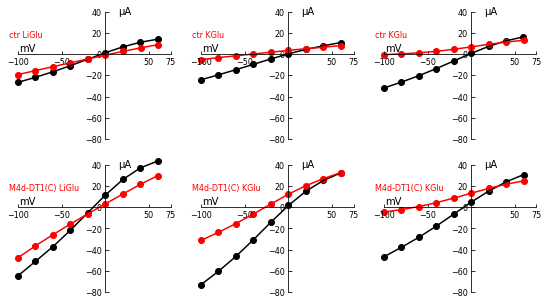

In [439]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
# if nrows = 2 axes[] counts rows and not col and limits axess handling

axes[0][0] = plt.subplot(2,3,1)
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][1] = plt.subplot(2,3,2)
plt.plot(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[0][2] = plt.subplot(2,3,3)
plt.plot(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    

# ###################################### mg742 
axes[1][0] = plt.subplot(2,3,4)
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][1] = plt.subplot(2,3,5)
plt.plot(Voltages_mg742KInmV[np.asarray(np.where(Solutions_Rec_mg742K == VarNaGlu_mg742K))[0,-1]],Currents_mg742KInuA[np.asarray(np.where(Solutions_Rec_mg742K == VarNaGlu_mg742K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742KInmV[np.asarray(np.where(Solutions_Rec_mg742K == VarNaGlu_mg742K))[0,-1]],Currents_mg742KInuA[np.asarray(np.where(Solutions_Rec_mg742K == VarNaGlu_mg742K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742KInmV[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]],Currents_mg742KInuA[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742KInmV[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]],Currents_mg742KInuA[np.asarray(np.where(Solutions_Rec_mg742K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][2] = plt.subplot(2,3,6)
plt.plot(Voltages_mg742NmgInmV[np.asarray(np.where(Solutions_Rec_mg742Nmg == VarNaGlu_mg742Nmg))[0,-1]],Currents_mg742NmgInuA[np.asarray(np.where(Solutions_Rec_mg742Nmg == VarNaGlu_mg742Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742NmgInmV[np.asarray(np.where(Solutions_Rec_mg742Nmg == VarNaGlu_mg742Nmg))[0,-1]],Currents_mg742NmgInuA[np.asarray(np.where(Solutions_Rec_mg742Nmg == VarNaGlu_mg742Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742NmgInmV[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]],Currents_mg742NmgInuA[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742NmgInmV[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]],Currents_mg742NmgInuA[np.asarray(np.where(Solutions_Rec_mg742Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    


###########################
xlimSet = [-100,75]
xticksSet=[-100,-50,50,75]
ylimSet = [-80,40]

#add ylim

for row in range(2): 
    for col in range(3):
        axes[row][col].set_xlim(xlimSet)
        axes[row][col].set_xticks(xticksSet)
        axes[row][col].set_ylim(ylimSet)
        # Hide the right and top spines
        axes[row][col].spines['right'].set_visible(False)
        axes[row][col].spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        axes[row][col].yaxis.set_ticks_position('left')
        axes[row][col].xaxis.set_ticks_position('bottom')
        axes[row][col].get_yaxis().set_tick_params(direction='in')
        axes[row][col].get_xaxis().set_tick_params(direction='in')
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        axes[row][col].spines['left'].set_position('zero')
        axes[row][col].spines['bottom'].set_position('zero')
        axes[row][col].set_xlabel('mV',fontsize=AxisLabelSize)
        axes[row][col].set_ylabel('µA',rotation=0,fontsize=AxisLabelSize)
        axes[row][col].xaxis.set_label_coords(0.06,0.75)
        axes[row][col].yaxis.set_label_coords(0.7,0.96)
        axes[row][col].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  


axes[0][0].text(-110, 15.8, 'ctr LiGlu',color='red',fontsize=AxisTickLabelSize)
axes[1][0].text(-110, 15.8, 'M4d-DT1(C) LiGlu',color='red',fontsize=AxisTickLabelSize)

axes[0][1].text(-110, 15.8, 'ctr KGlu',color='red',fontsize=AxisTickLabelSize)
axes[1][1].text(-110, 15.8, 'M4d-DT1(C) KGlu',color='red',fontsize=AxisTickLabelSize)

axes[0][2].text(-110, 15.8, 'ctr KGlu',color='red',fontsize=AxisTickLabelSize)
axes[1][2].text(-110, 15.8, 'M4d-DT1(C) KGlu',color='red',fontsize=AxisTickLabelSize)


plt.gcf().subplots_adjust(bottom=0.1, left=0.1,right=None, top=None,hspace=None, wspace=None)     
      
plt.savefig(filedirExportFig+"IVcurvesSelectivity-chimera"+'.pdf')


# Figure Liglu alanine mutants

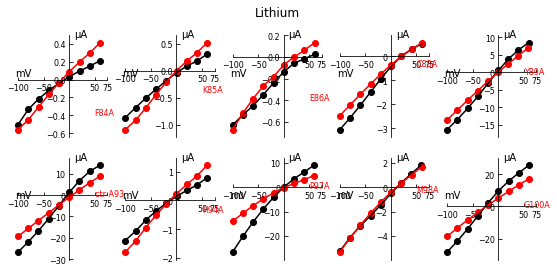

In [481]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(9, 4))
# if nrows = 2 axes[] counts rows and not col and limits axess handling



axes[0][0] = plt.subplot(2,5,1)
plt.plot(Voltages_mg738LiInmV[np.asarray(np.where(Solutions_Rec_mg738Li == VarNaGlu_mg738Li))[0,-1]],Currents_mg738LiInuA[np.asarray(np.where(Solutions_Rec_mg738Li == VarNaGlu_mg738Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg738LiInmV[np.asarray(np.where(Solutions_Rec_mg738Li == VarNaGlu_mg738Li))[0,-1]],Currents_mg738LiInuA[np.asarray(np.where(Solutions_Rec_mg738Li == VarNaGlu_mg738Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg738LiInmV[np.asarray(np.where(Solutions_Rec_mg738Li == 'LiGluSel'))[0,-1]],Currents_mg738LiInuA[np.asarray(np.where(Solutions_Rec_mg738Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg738LiInmV[np.asarray(np.where(Solutions_Rec_mg738Li == 'LiGluSel'))[0,-1]],Currents_mg738LiInuA[np.asarray(np.where(Solutions_Rec_mg738Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][1] = plt.subplot(2,5,2)
plt.plot(Voltages_mg739LiInmV[np.asarray(np.where(Solutions_Rec_mg739Li == VarNaGlu_mg739Li))[0,-1]],Currents_mg739LiInuA[np.asarray(np.where(Solutions_Rec_mg739Li == VarNaGlu_mg739Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg739LiInmV[np.asarray(np.where(Solutions_Rec_mg739Li == VarNaGlu_mg739Li))[0,-1]],Currents_mg739LiInuA[np.asarray(np.where(Solutions_Rec_mg739Li == VarNaGlu_mg739Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg739LiInmV[np.asarray(np.where(Solutions_Rec_mg739Li == 'LiGluSel'))[0,-1]],Currents_mg739LiInuA[np.asarray(np.where(Solutions_Rec_mg739Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg739LiInmV[np.asarray(np.where(Solutions_Rec_mg739Li == 'LiGluSel'))[0,-1]],Currents_mg739LiInuA[np.asarray(np.where(Solutions_Rec_mg739Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][2] = plt.subplot(2,5,3)
plt.plot(Voltages_mg740LiInmV[np.asarray(np.where(Solutions_Rec_mg740Li == VarNaGlu_mg740Li))[0,-1]],Currents_mg740LiInuA[np.asarray(np.where(Solutions_Rec_mg740Li == VarNaGlu_mg740Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg740LiInmV[np.asarray(np.where(Solutions_Rec_mg740Li == VarNaGlu_mg740Li))[0,-1]],Currents_mg740LiInuA[np.asarray(np.where(Solutions_Rec_mg740Li == VarNaGlu_mg740Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg740LiInmV[np.asarray(np.where(Solutions_Rec_mg740Li == 'LiGluSel'))[0,-1]],Currents_mg740LiInuA[np.asarray(np.where(Solutions_Rec_mg740Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg740LiInmV[np.asarray(np.where(Solutions_Rec_mg740Li == 'LiGluSel'))[0,-1]],Currents_mg740LiInuA[np.asarray(np.where(Solutions_Rec_mg740Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][3] = plt.subplot(2,5,4)
plt.plot(Voltages_mg748LiInmV[np.asarray(np.where(Solutions_Rec_mg748Li == VarNaGlu_mg748Li))[0,-1]],Currents_mg748LiInuA[np.asarray(np.where(Solutions_Rec_mg748Li == VarNaGlu_mg748Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg748LiInmV[np.asarray(np.where(Solutions_Rec_mg748Li == VarNaGlu_mg748Li))[0,-1]],Currents_mg748LiInuA[np.asarray(np.where(Solutions_Rec_mg748Li == VarNaGlu_mg748Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg748LiInmV[np.asarray(np.where(Solutions_Rec_mg748Li == 'LiGluSel'))[0,-1]],Currents_mg748LiInuA[np.asarray(np.where(Solutions_Rec_mg748Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg748LiInmV[np.asarray(np.where(Solutions_Rec_mg748Li == 'LiGluSel'))[0,-1]],Currents_mg748LiInuA[np.asarray(np.where(Solutions_Rec_mg748Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    



axes[0][4] = plt.subplot(2,5,5)
plt.plot(Voltages_mg759LiInmV[np.asarray(np.where(Solutions_Rec_mg759Li == VarNaGlu_mg759Li))[0,-1]],Currents_mg759LiInuA[np.asarray(np.where(Solutions_Rec_mg759Li == VarNaGlu_mg759Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg759LiInmV[np.asarray(np.where(Solutions_Rec_mg759Li == VarNaGlu_mg759Li))[0,-1]],Currents_mg759LiInuA[np.asarray(np.where(Solutions_Rec_mg759Li == VarNaGlu_mg759Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg759LiInmV[np.asarray(np.where(Solutions_Rec_mg759Li == 'LiGluSel'))[0,-1]],Currents_mg759LiInuA[np.asarray(np.where(Solutions_Rec_mg759Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg759LiInmV[np.asarray(np.where(Solutions_Rec_mg759Li == 'LiGluSel'))[0,-1]],Currents_mg759LiInuA[np.asarray(np.where(Solutions_Rec_mg759Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    

# ###################################### 
axes[1][0] = plt.subplot(2,5,6)
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][1] = plt.subplot(2,5,7)
plt.plot(Voltages_mg750LiInmV[np.asarray(np.where(Solutions_Rec_mg750Li == VarNaGlu_mg750Li))[0,-1]],Currents_mg750LiInuA[np.asarray(np.where(Solutions_Rec_mg750Li == VarNaGlu_mg750Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg750LiInmV[np.asarray(np.where(Solutions_Rec_mg750Li == VarNaGlu_mg750Li))[0,-1]],Currents_mg750LiInuA[np.asarray(np.where(Solutions_Rec_mg750Li == VarNaGlu_mg750Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg750LiInmV[np.asarray(np.where(Solutions_Rec_mg750Li == 'LiGluSel'))[0,-1]],Currents_mg750LiInuA[np.asarray(np.where(Solutions_Rec_mg750Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg750LiInmV[np.asarray(np.where(Solutions_Rec_mg750Li == 'LiGluSel'))[0,-1]],Currents_mg750LiInuA[np.asarray(np.where(Solutions_Rec_mg750Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[1][2] = plt.subplot(2,5,8)
plt.plot(Voltages_mg760LiInmV[np.asarray(np.where(Solutions_Rec_mg760Li == VarNaGlu_mg760Li))[0,-1]],Currents_mg760LiInuA[np.asarray(np.where(Solutions_Rec_mg760Li == VarNaGlu_mg760Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg760LiInmV[np.asarray(np.where(Solutions_Rec_mg760Li == VarNaGlu_mg760Li))[0,-1]],Currents_mg760LiInuA[np.asarray(np.where(Solutions_Rec_mg760Li == VarNaGlu_mg760Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg760LiInmV[np.asarray(np.where(Solutions_Rec_mg760Li == 'LiGluSel'))[0,-1]],Currents_mg760LiInuA[np.asarray(np.where(Solutions_Rec_mg760Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg760LiInmV[np.asarray(np.where(Solutions_Rec_mg760Li == 'LiGluSel'))[0,-1]],Currents_mg760LiInuA[np.asarray(np.where(Solutions_Rec_mg760Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[1][3] = plt.subplot(2,5,9)
plt.plot(Voltages_mg753LiInmV[np.asarray(np.where(Solutions_Rec_mg753Li == VarNaGlu_mg753Li))[0,-1]],Currents_mg753LiInuA[np.asarray(np.where(Solutions_Rec_mg753Li == VarNaGlu_mg753Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg753LiInmV[np.asarray(np.where(Solutions_Rec_mg753Li == VarNaGlu_mg753Li))[0,-1]],Currents_mg753LiInuA[np.asarray(np.where(Solutions_Rec_mg753Li == VarNaGlu_mg753Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg753LiInmV[np.asarray(np.where(Solutions_Rec_mg753Li == 'LiGluSel'))[0,-1]],Currents_mg753LiInuA[np.asarray(np.where(Solutions_Rec_mg753Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg753LiInmV[np.asarray(np.where(Solutions_Rec_mg753Li == 'LiGluSel'))[0,-1]],Currents_mg753LiInuA[np.asarray(np.where(Solutions_Rec_mg753Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[1][4] = plt.subplot(2,5,10)
plt.plot(Voltages_mg751LiInmV[np.asarray(np.where(Solutions_Rec_mg751Li == VarNaGlu_mg751Li))[0,-1]],Currents_mg751LiInuA[np.asarray(np.where(Solutions_Rec_mg751Li == VarNaGlu_mg751Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg751LiInmV[np.asarray(np.where(Solutions_Rec_mg751Li == VarNaGlu_mg751Li))[0,-1]],Currents_mg751LiInuA[np.asarray(np.where(Solutions_Rec_mg751Li == VarNaGlu_mg751Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg751LiInmV[np.asarray(np.where(Solutions_Rec_mg751Li == 'LiGluSel'))[0,-1]],Currents_mg751LiInuA[np.asarray(np.where(Solutions_Rec_mg751Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg751LiInmV[np.asarray(np.where(Solutions_Rec_mg751Li == 'LiGluSel'))[0,-1]],Currents_mg751LiInuA[np.asarray(np.where(Solutions_Rec_mg751Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    



###########################
xlimSet = [-100,75]
xticksSet=[-100,-50,50,75]
ylimSet = [-80,40]

#add ylim

for row in range(2): 
    for col in range(5):
        axes[row][col].set_xlim(xlimSet)
        axes[row][col].set_xticks(xticksSet)
        #axes[row][col].set_ylim(ylimSet)
        # Hide the right and top spines
        axes[row][col].spines['right'].set_visible(False)
        axes[row][col].spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        axes[row][col].yaxis.set_ticks_position('left')
        axes[row][col].xaxis.set_ticks_position('bottom')
        axes[row][col].get_yaxis().set_tick_params(direction='in')
        axes[row][col].get_xaxis().set_tick_params(direction='in')
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        axes[row][col].spines['left'].set_position('zero')
        axes[row][col].spines['bottom'].set_position('zero')
        axes[row][col].set_xlabel('mV',fontsize=AxisLabelSize)
        axes[row][col].set_ylabel('µA',rotation=0,fontsize=AxisLabelSize)
        axes[row][col].xaxis.set_label_coords(0.06,0.68)
        axes[row][col].yaxis.set_label_coords(0.7,0.96)
        axes[row][col].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  


n = 0        
for row in range(2): 
    for col in range(5):       
        axes[row][col].text( 50,-0.4,LabelAlanin[n],color='red',fontsize=AxisTickLabelSize)
        n = n+1





plt.suptitle('Lithium')


plt.gcf().subplots_adjust(bottom=0.1, left=0.1,right=None, top=None,hspace=None, wspace=None)     
      
plt.savefig(filedirExportFig+"IVcurvesSelectivity-Alanine-Lithium"+'.pdf')


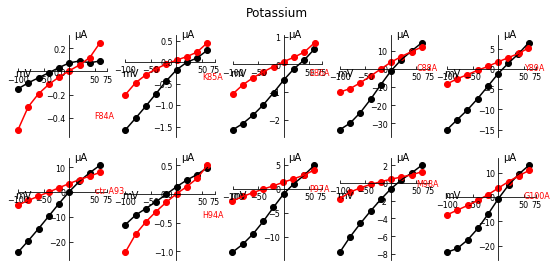

In [495]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(9, 4))
# if nrows = 2 axes[] counts rows and not col and limits axess handling



axes[0][0] = plt.subplot(2,5,1)
plt.plot(Voltages_mg738KInmV[np.asarray(np.where(Solutions_Rec_mg738K == VarNaGlu_mg738K))[0,-1]],Currents_mg738KInuA[np.asarray(np.where(Solutions_Rec_mg738K == VarNaGlu_mg738K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg738KInmV[np.asarray(np.where(Solutions_Rec_mg738K == VarNaGlu_mg738K))[0,-1]],Currents_mg738KInuA[np.asarray(np.where(Solutions_Rec_mg738K == VarNaGlu_mg738K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg738KInmV[np.asarray(np.where(Solutions_Rec_mg738K == 'KGluSel'))[0,-1]],Currents_mg738KInuA[np.asarray(np.where(Solutions_Rec_mg738K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg738KInmV[np.asarray(np.where(Solutions_Rec_mg738K == 'KGluSel'))[0,-1]],Currents_mg738KInuA[np.asarray(np.where(Solutions_Rec_mg738K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][1] = plt.subplot(2,5,2)

plt.plot(Voltages_mg739KInmV[np.asarray(np.where(Solutions_Rec_mg739K == VarNaGlu_mg739K))[0,-1]],Currents_mg739KInuA[np.asarray(np.where(Solutions_Rec_mg739K == VarNaGlu_mg739K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg739KInmV[np.asarray(np.where(Solutions_Rec_mg739K == VarNaGlu_mg739K))[0,-1]],Currents_mg739KInuA[np.asarray(np.where(Solutions_Rec_mg739K == VarNaGlu_mg739K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg739KInmV[np.asarray(np.where(Solutions_Rec_mg739K == 'KGluSel'))[0,-1]],Currents_mg739KInuA[np.asarray(np.where(Solutions_Rec_mg739K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg739KInmV[np.asarray(np.where(Solutions_Rec_mg739K == 'KGluSel'))[0,-1]],Currents_mg739KInuA[np.asarray(np.where(Solutions_Rec_mg739K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[0][2] = plt.subplot(2,5,3)

plt.plot(Voltages_mg740KInmV[np.asarray(np.where(Solutions_Rec_mg740K == VarNaGlu_mg740K))[0,-1]],Currents_mg740KInuA[np.asarray(np.where(Solutions_Rec_mg740K == VarNaGlu_mg740K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg740KInmV[np.asarray(np.where(Solutions_Rec_mg740K == VarNaGlu_mg740K))[0,-1]],Currents_mg740KInuA[np.asarray(np.where(Solutions_Rec_mg740K == VarNaGlu_mg740K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg740KInmV[np.asarray(np.where(Solutions_Rec_mg740K == 'KGluSel'))[0,-1]],Currents_mg740KInuA[np.asarray(np.where(Solutions_Rec_mg740K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg740KInmV[np.asarray(np.where(Solutions_Rec_mg740K == 'KGluSel'))[0,-1]],Currents_mg740KInuA[np.asarray(np.where(Solutions_Rec_mg740K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[0][3] = plt.subplot(2,5,4)
plt.plot(Voltages_mg748KInmV[np.asarray(np.where(Solutions_Rec_mg748K == VarNaGlu_mg748K))[0,-1]],Currents_mg748KInuA[np.asarray(np.where(Solutions_Rec_mg748K == VarNaGlu_mg748K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg748KInmV[np.asarray(np.where(Solutions_Rec_mg748K == VarNaGlu_mg748K))[0,-1]],Currents_mg748KInuA[np.asarray(np.where(Solutions_Rec_mg748K == VarNaGlu_mg748K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg748KInmV[np.asarray(np.where(Solutions_Rec_mg748K == 'KGluSel'))[0,-1]],Currents_mg748KInuA[np.asarray(np.where(Solutions_Rec_mg748K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg748KInmV[np.asarray(np.where(Solutions_Rec_mg748K == 'KGluSel'))[0,-1]],Currents_mg748KInuA[np.asarray(np.where(Solutions_Rec_mg748K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    



axes[0][4] = plt.subplot(2,5,5)
plt.plot(Voltages_mg759KInmV[np.asarray(np.where(Solutions_Rec_mg759K == VarNaGlu_mg759K))[0,-1]],Currents_mg759KInuA[np.asarray(np.where(Solutions_Rec_mg759K == VarNaGlu_mg759K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg759KInmV[np.asarray(np.where(Solutions_Rec_mg759K == VarNaGlu_mg759K))[0,-1]],Currents_mg759KInuA[np.asarray(np.where(Solutions_Rec_mg759K == VarNaGlu_mg759K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg759KInmV[np.asarray(np.where(Solutions_Rec_mg759K == 'KGluSel'))[0,-1]],Currents_mg759KInuA[np.asarray(np.where(Solutions_Rec_mg759K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg759KInmV[np.asarray(np.where(Solutions_Rec_mg759K == 'KGluSel'))[0,-1]],Currents_mg759KInuA[np.asarray(np.where(Solutions_Rec_mg759K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

# ###################################### 
axes[1][0] = plt.subplot(2,5,6)
plt.plot(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == VarNaGlu_mg419K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419KInmV[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],Currents_mg419KInuA[np.asarray(np.where(Solutions_Rec_mg419K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][1] = plt.subplot(2,5,7)
plt.plot(Voltages_mg750KInmV[np.asarray(np.where(Solutions_Rec_mg750K == VarNaGlu_mg750K))[0,-1]],Currents_mg750KInuA[np.asarray(np.where(Solutions_Rec_mg750K == VarNaGlu_mg750K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg750KInmV[np.asarray(np.where(Solutions_Rec_mg750K == VarNaGlu_mg750K))[0,-1]],Currents_mg750KInuA[np.asarray(np.where(Solutions_Rec_mg750K == VarNaGlu_mg750K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg750KInmV[np.asarray(np.where(Solutions_Rec_mg750K == 'KGluSel'))[0,-1]],Currents_mg750KInuA[np.asarray(np.where(Solutions_Rec_mg750K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg750KInmV[np.asarray(np.where(Solutions_Rec_mg750K == 'KGluSel'))[0,-1]],Currents_mg750KInuA[np.asarray(np.where(Solutions_Rec_mg750K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[1][2] = plt.subplot(2,5,8)

plt.plot(Voltages_mg760KInmV[np.asarray(np.where(Solutions_Rec_mg760K == VarNaGlu_mg760K))[0,-1]],Currents_mg760KInuA[np.asarray(np.where(Solutions_Rec_mg760K == VarNaGlu_mg760K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg760KInmV[np.asarray(np.where(Solutions_Rec_mg760K == VarNaGlu_mg760K))[0,-1]],Currents_mg760KInuA[np.asarray(np.where(Solutions_Rec_mg760K == VarNaGlu_mg760K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg760KInmV[np.asarray(np.where(Solutions_Rec_mg760K == 'KGluSel'))[0,-1]],Currents_mg760KInuA[np.asarray(np.where(Solutions_Rec_mg760K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg760KInmV[np.asarray(np.where(Solutions_Rec_mg760K == 'KGluSel'))[0,-1]],Currents_mg760KInuA[np.asarray(np.where(Solutions_Rec_mg760K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][3] = plt.subplot(2,5,9)
plt.plot(Voltages_mg753KInmV[np.asarray(np.where(Solutions_Rec_mg753K == VarNaGlu_mg753K))[0,-1]],Currents_mg753KInuA[np.asarray(np.where(Solutions_Rec_mg753K == VarNaGlu_mg753K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg753KInmV[np.asarray(np.where(Solutions_Rec_mg753K == VarNaGlu_mg753K))[0,-1]],Currents_mg753KInuA[np.asarray(np.where(Solutions_Rec_mg753K == VarNaGlu_mg753K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg753KInmV[np.asarray(np.where(Solutions_Rec_mg753K == 'KGluSel'))[0,-1]],Currents_mg753KInuA[np.asarray(np.where(Solutions_Rec_mg753K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg753KInmV[np.asarray(np.where(Solutions_Rec_mg753K == 'KGluSel'))[0,-1]],Currents_mg753KInuA[np.asarray(np.where(Solutions_Rec_mg753K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[1][4] = plt.subplot(2,5,10)
plt.plot(Voltages_mg751KInmV[np.asarray(np.where(Solutions_Rec_mg751K == VarNaGlu_mg751K))[0,-1]],Currents_mg751KInuA[np.asarray(np.where(Solutions_Rec_mg751K == VarNaGlu_mg751K))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg751KInmV[np.asarray(np.where(Solutions_Rec_mg751K == VarNaGlu_mg751K))[0,-1]],Currents_mg751KInuA[np.asarray(np.where(Solutions_Rec_mg751K == VarNaGlu_mg751K))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg751KInmV[np.asarray(np.where(Solutions_Rec_mg751K == 'KGluSel'))[0,-1]],Currents_mg751KInuA[np.asarray(np.where(Solutions_Rec_mg751K == 'KGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg751KInmV[np.asarray(np.where(Solutions_Rec_mg751K == 'KGluSel'))[0,-1]],Currents_mg751KInuA[np.asarray(np.where(Solutions_Rec_mg751K == 'KGluSel'))[0,-1]],color = 'red',clip_on=False)    



###########################
xlimSet = [-100,75]
xticksSet=[-100,-50,50,75]
ylimSet = [-80,40]

#add ylim

for row in range(2): 
    for col in range(5):
        axes[row][col].set_xlim(xlimSet)
        axes[row][col].set_xticks(xticksSet)
        #axes[row][col].set_ylim(ylimSet)
        # Hide the right and top spines
        axes[row][col].spines['right'].set_visible(False)
        axes[row][col].spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        axes[row][col].yaxis.set_ticks_position('left')
        axes[row][col].xaxis.set_ticks_position('bottom')
        axes[row][col].get_yaxis().set_tick_params(direction='in')
        axes[row][col].get_xaxis().set_tick_params(direction='in')
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        axes[row][col].spines['left'].set_position('zero')
        axes[row][col].spines['bottom'].set_position('zero')
        axes[row][col].set_xlabel('mV',fontsize=AxisLabelSize)
        axes[row][col].set_ylabel('µA',rotation=0,fontsize=AxisLabelSize)
        axes[row][col].xaxis.set_label_coords(0.06,0.68)
        axes[row][col].yaxis.set_label_coords(0.7,0.96)
        axes[row][col].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  


n = 0        
for row in range(2): 
    for col in range(5):       
        axes[row][col].text( 50,-0.4,LabelAlanin[n],color='red',fontsize=AxisTickLabelSize)
        n = n+1





plt.suptitle('Potassium')


plt.gcf().subplots_adjust(bottom=0.1, left=0.1,right=None, top=None,hspace=None, wspace=None)     
      
plt.savefig(filedirExportFig+"IVcurvesSelectivity-Alanine-Potassium"+'.pdf')


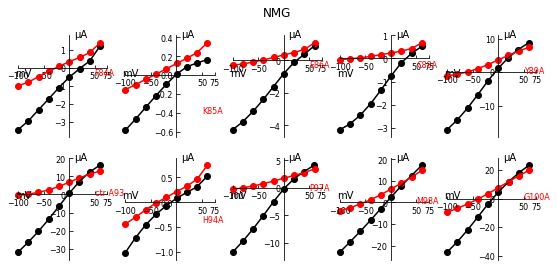

In [509]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(9, 4))
# if nrows = 2 axes[] counts rows and not col and limits axess handling



axes[0][0] = plt.subplot(2,5,1)
plt.plot(Voltages_mg738NmgInmV[np.asarray(np.where(Solutions_Rec_mg738Nmg == VarNaGlu_mg738Nmg))[0,-1]],Currents_mg738NmgInuA[np.asarray(np.where(Solutions_Rec_mg738Nmg == VarNaGlu_mg738Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg738NmgInmV[np.asarray(np.where(Solutions_Rec_mg738Nmg == VarNaGlu_mg738Nmg))[0,-1]],Currents_mg738NmgInuA[np.asarray(np.where(Solutions_Rec_mg738Nmg == VarNaGlu_mg738Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg738NmgInmV[np.asarray(np.where(Solutions_Rec_mg738Nmg == 'NmgGluSel'))[0,-1]],Currents_mg738NmgInuA[np.asarray(np.where(Solutions_Rec_mg738Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg738NmgInmV[np.asarray(np.where(Solutions_Rec_mg738Nmg == 'NmgGluSel'))[0,-1]],Currents_mg738NmgInuA[np.asarray(np.where(Solutions_Rec_mg738Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    



axes[0][1] = plt.subplot(2,5,2)

plt.plot(Voltages_mg739NmgInmV[np.asarray(np.where(Solutions_Rec_mg739Nmg == VarNaGlu_mg739Nmg))[0,-1]],Currents_mg739NmgInuA[np.asarray(np.where(Solutions_Rec_mg739Nmg == VarNaGlu_mg739Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg739NmgInmV[np.asarray(np.where(Solutions_Rec_mg739Nmg == VarNaGlu_mg739Nmg))[0,-1]],Currents_mg739NmgInuA[np.asarray(np.where(Solutions_Rec_mg739Nmg == VarNaGlu_mg739Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg739NmgInmV[np.asarray(np.where(Solutions_Rec_mg739Nmg == 'NmgGluSel'))[0,-1]],Currents_mg739NmgInuA[np.asarray(np.where(Solutions_Rec_mg739Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg739NmgInmV[np.asarray(np.where(Solutions_Rec_mg739Nmg == 'NmgGluSel'))[0,-1]],Currents_mg739NmgInuA[np.asarray(np.where(Solutions_Rec_mg739Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][2] = plt.subplot(2,5,3)
plt.plot(Voltages_mg740NmgInmV[np.asarray(np.where(Solutions_Rec_mg740Nmg == VarNaGlu_mg740Nmg))[0,-1]],Currents_mg740NmgInuA[np.asarray(np.where(Solutions_Rec_mg740Nmg == VarNaGlu_mg740Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg740NmgInmV[np.asarray(np.where(Solutions_Rec_mg740Nmg == VarNaGlu_mg740Nmg))[0,-1]],Currents_mg740NmgInuA[np.asarray(np.where(Solutions_Rec_mg740Nmg == VarNaGlu_mg740Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg740NmgInmV[np.asarray(np.where(Solutions_Rec_mg740Nmg == 'NmgGluSel'))[0,-1]],Currents_mg740NmgInuA[np.asarray(np.where(Solutions_Rec_mg740Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg740NmgInmV[np.asarray(np.where(Solutions_Rec_mg740Nmg == 'NmgGluSel'))[0,-1]],Currents_mg740NmgInuA[np.asarray(np.where(Solutions_Rec_mg740Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    



axes[0][3] = plt.subplot(2,5,4)

plt.plot(Voltages_mg748NmgInmV[np.asarray(np.where(Solutions_Rec_mg748Nmg == VarNaGlu_mg748Nmg))[0,-1]],Currents_mg748NmgInuA[np.asarray(np.where(Solutions_Rec_mg748Nmg == VarNaGlu_mg748Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg748NmgInmV[np.asarray(np.where(Solutions_Rec_mg748Nmg == VarNaGlu_mg748Nmg))[0,-1]],Currents_mg748NmgInuA[np.asarray(np.where(Solutions_Rec_mg748Nmg == VarNaGlu_mg748Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg748NmgInmV[np.asarray(np.where(Solutions_Rec_mg748Nmg == 'NmgGluSel'))[0,-1]],Currents_mg748NmgInuA[np.asarray(np.where(Solutions_Rec_mg748Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg748NmgInmV[np.asarray(np.where(Solutions_Rec_mg748Nmg == 'NmgGluSel'))[0,-1]],Currents_mg748NmgInuA[np.asarray(np.where(Solutions_Rec_mg748Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][4] = plt.subplot(2,5,5)
plt.plot(Voltages_mg759NmgInmV[np.asarray(np.where(Solutions_Rec_mg759Nmg == VarNaGlu_mg759Nmg))[0,-1]],Currents_mg759NmgInuA[np.asarray(np.where(Solutions_Rec_mg759Nmg == VarNaGlu_mg759Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg759NmgInmV[np.asarray(np.where(Solutions_Rec_mg759Nmg == VarNaGlu_mg759Nmg))[0,-1]],Currents_mg759NmgInuA[np.asarray(np.where(Solutions_Rec_mg759Nmg == VarNaGlu_mg759Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg759NmgInmV[np.asarray(np.where(Solutions_Rec_mg759Nmg == 'NmgGluSel'))[0,-1]],Currents_mg759NmgInuA[np.asarray(np.where(Solutions_Rec_mg759Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg759NmgInmV[np.asarray(np.where(Solutions_Rec_mg759Nmg == 'NmgGluSel'))[0,-1]],Currents_mg759NmgInuA[np.asarray(np.where(Solutions_Rec_mg759Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    


# ###################################### 
axes[1][0] = plt.subplot(2,5,6)
plt.plot(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == VarNaGlu_mg419Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419NmgInmV[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],Currents_mg419NmgInuA[np.asarray(np.where(Solutions_Rec_mg419Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[1][1] = plt.subplot(2,5,7)
plt.plot(Voltages_mg750NmgInmV[np.asarray(np.where(Solutions_Rec_mg750Nmg == VarNaGlu_mg750Nmg))[0,-1]],Currents_mg750NmgInuA[np.asarray(np.where(Solutions_Rec_mg750Nmg == VarNaGlu_mg750Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg750NmgInmV[np.asarray(np.where(Solutions_Rec_mg750Nmg == VarNaGlu_mg750Nmg))[0,-1]],Currents_mg750NmgInuA[np.asarray(np.where(Solutions_Rec_mg750Nmg == VarNaGlu_mg750Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg750NmgInmV[np.asarray(np.where(Solutions_Rec_mg750Nmg == 'NmgGluSel'))[0,-1]],Currents_mg750NmgInuA[np.asarray(np.where(Solutions_Rec_mg750Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg750NmgInmV[np.asarray(np.where(Solutions_Rec_mg750Nmg == 'NmgGluSel'))[0,-1]],Currents_mg750NmgInuA[np.asarray(np.where(Solutions_Rec_mg750Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[1][2] = plt.subplot(2,5,8)

plt.plot(Voltages_mg760NmgInmV[np.asarray(np.where(Solutions_Rec_mg760Nmg == VarNaGlu_mg760Nmg))[0,-1]],Currents_mg760NmgInuA[np.asarray(np.where(Solutions_Rec_mg760Nmg == VarNaGlu_mg760Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg760NmgInmV[np.asarray(np.where(Solutions_Rec_mg760Nmg == VarNaGlu_mg760Nmg))[0,-1]],Currents_mg760NmgInuA[np.asarray(np.where(Solutions_Rec_mg760Nmg == VarNaGlu_mg760Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg760NmgInmV[np.asarray(np.where(Solutions_Rec_mg760Nmg == 'NmgGluSel'))[0,-1]],Currents_mg760NmgInuA[np.asarray(np.where(Solutions_Rec_mg760Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg760NmgInmV[np.asarray(np.where(Solutions_Rec_mg760Nmg == 'NmgGluSel'))[0,-1]],Currents_mg760NmgInuA[np.asarray(np.where(Solutions_Rec_mg760Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[1][3] = plt.subplot(2,5,9)
plt.plot(Voltages_mg753NmgInmV[np.asarray(np.where(Solutions_Rec_mg753Nmg == VarNaGlu_mg753Nmg))[0,-1]],Currents_mg753NmgInuA[np.asarray(np.where(Solutions_Rec_mg753Nmg == VarNaGlu_mg753Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg753NmgInmV[np.asarray(np.where(Solutions_Rec_mg753Nmg == VarNaGlu_mg753Nmg))[0,-1]],Currents_mg753NmgInuA[np.asarray(np.where(Solutions_Rec_mg753Nmg == VarNaGlu_mg753Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg753NmgInmV[np.asarray(np.where(Solutions_Rec_mg753Nmg == 'NmgGluSel'))[0,-1]],Currents_mg753NmgInuA[np.asarray(np.where(Solutions_Rec_mg753Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg753NmgInmV[np.asarray(np.where(Solutions_Rec_mg753Nmg == 'NmgGluSel'))[0,-1]],Currents_mg753NmgInuA[np.asarray(np.where(Solutions_Rec_mg753Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    



axes[1][4] = plt.subplot(2,5,10)

plt.plot(Voltages_mg751NmgInmV[np.asarray(np.where(Solutions_Rec_mg751Nmg == VarNaGlu_mg751Nmg))[0,-1]],Currents_mg751NmgInuA[np.asarray(np.where(Solutions_Rec_mg751Nmg == VarNaGlu_mg751Nmg))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg751NmgInmV[np.asarray(np.where(Solutions_Rec_mg751Nmg == VarNaGlu_mg751Nmg))[0,-1]],Currents_mg751NmgInuA[np.asarray(np.where(Solutions_Rec_mg751Nmg == VarNaGlu_mg751Nmg))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg751NmgInmV[np.asarray(np.where(Solutions_Rec_mg751Nmg == 'NmgGluSel'))[0,-1]],Currents_mg751NmgInuA[np.asarray(np.where(Solutions_Rec_mg751Nmg == 'NmgGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg751NmgInmV[np.asarray(np.where(Solutions_Rec_mg751Nmg == 'NmgGluSel'))[0,-1]],Currents_mg751NmgInuA[np.asarray(np.where(Solutions_Rec_mg751Nmg == 'NmgGluSel'))[0,-1]],color = 'red',clip_on=False)    



###########################
xlimSet = [-100,75]
xticksSet=[-100,-50,50,75]
ylimSet = [-80,40]

#add ylim

for row in range(2): 
    for col in range(5):
        axes[row][col].set_xlim(xlimSet)
        axes[row][col].set_xticks(xticksSet)
        #axes[row][col].set_ylim(ylimSet)
        # Hide the right and top spines
        axes[row][col].spines['right'].set_visible(False)
        axes[row][col].spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        axes[row][col].yaxis.set_ticks_position('left')
        axes[row][col].xaxis.set_ticks_position('bottom')
        axes[row][col].get_yaxis().set_tick_params(direction='in')
        axes[row][col].get_xaxis().set_tick_params(direction='in')
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        axes[row][col].spines['left'].set_position('zero')
        axes[row][col].spines['bottom'].set_position('zero')
        axes[row][col].set_xlabel('mV',fontsize=AxisLabelSize)
        axes[row][col].set_ylabel('µA',rotation=0,fontsize=AxisLabelSize)
        axes[row][col].xaxis.set_label_coords(0.06,0.68)
        axes[row][col].yaxis.set_label_coords(0.7,0.96)
        axes[row][col].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  


n = 0        
for row in range(2): 
    for col in range(5):       
        axes[row][col].text( 50,-0.4,LabelAlanin[n],color='red',fontsize=AxisTickLabelSize)
        n = n+1





plt.suptitle('NMG')


plt.gcf().subplots_adjust(bottom=0.1, left=0.1,right=None, top=None,hspace=None, wspace=None)     
      
plt.savefig(filedirExportFig+"IVcurvesSelectivity-Alanine-NMG"+'.pdf')
